# Data Stock Price Analysis

**By: Ar Rafiul Islam.**

Below you can find my answers to the second assessed coursework for Scientific Computing in Finance.

The `ipynb` file includes comments, annotated graphs and explanations for each of the exercises to help the reader understand my *way of thinking* and understanding while writing the lines of code. It will also include **improvement** points to explain the issues/uncertainties encountered with my methods/approaches to questions.

There will also be some **"Notes"** that will explain why I do things in a certain way or why sometimes running the code might give something not expected or explain something specific.

**Some preliminary notes**:
- When similar code is used later in the report, I will not copy all the comments, just the main ones to make the reader understand the main purpose of the code (the main difference)
- Sometimes I use different approaches to the same question to see which one looks more suitable or generates better results. I will explain each of them and their potential issues or strenghts
- There will be explanations as we go through the coursework for each exercise
- Sometimes I follow a step-by-step process but if a similar technique is applied to some following "sub-questions", I tend to summarise the steps and focus more in the explanation
- JB refers to Jarque-Bera (I  tend use them interchangeably as a shorthand notation)

**Important Note**: Also, the whole file takes around **170** seconds to execute in my machine because of the bootstrap methods and replication numbers used. Feel free to reduce the number of bootstrap replications if you want to run the code. I named my variable `bootstrap_replications`. You can use it to search and change replication numbers.

***

## Preliminaries:

In [136]:
# Importing the relevant libraries, modules and packages to start analysing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This is not necessary to import but I did it to check the running time of my code since I use bootstrap and wanted to look at perforamnce
import time
start_time = time.time()

In [137]:
# Loading the data
prices = pd.read_csv("C:\\Users\\rafiu\\Desktop\\Lab8\\sap100.csv")

**Note**: I chose a differet way to load the data than what we did in classes. Feel free to reach if doesn't work in your machine.

In [138]:
# Visualising the first 5 entries of the S&P 100 data set
prices.head()

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
0,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
1,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
3,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
4,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


In [139]:
# Visualising the last 3 entries of the S&P 100 data set
prices.tail(3)

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
1785,2023-07-11 00:00:00,188.080002,34.990002,30.570000,42.740002,154.649994,105.970001,107.500000,504.739990,58.750000,...,140.020004,269.790009,178.820007,462.890015,206.789993,185.240005,34.919998,240.550003,135.570007,309.720001
1786,2023-07-12 00:00:00,189.770004,34.860001,30.320000,43.259998,155.039993,106.489998,106.849998,507.359985,58.650002,...,140.889999,271.989990,182.369995,451.700012,208.919998,186.490005,35.110001,242.210007,134.979996,313.880005
1787,2023-07-13 00:00:00,190.669998,34.599998,29.735001,43.365002,154.589996,103.550003,107.065002,516.974976,58.450001,...,140.035004,275.649994,183.654999,449.885010,210.195007,186.020004,35.465000,243.809998,133.589996,315.445007


In [140]:
# Looking at the shape of the DataFrame
prices.shape

(1788, 102)

### Explanation of the above - Main points:
- The data set shows the daily stock prices for the **S&P 100** from **06-06-2016** to **13-07-2023**
- The `prices.shape` code shows that we have in total 1788 data points/entries for each stock in the index 

The second point will be important to keep in mind for future steps in the (statistical) analysis and the data manipulation process.

<br>

## Exercise 1:

#### Initial data alanysis, manipulation and visualisation:

For **Exercise 1**, I chose **Visa** as my stock to perform the computation and analysis on.

In [141]:
# Let's see the Visa stock:
prices["V"].head()

0    80.540001
1    80.599998
2    81.650002
3    81.260002
4    80.180000
Name: V, dtype: float64

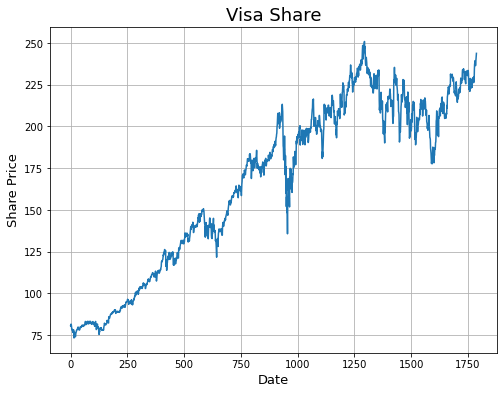

In [142]:
# Visualising the share price over the given time period

# Changing the font size and adding axis names, title and gridlines
plt.xlabel(r"Date", fontsize=13)
plt.ylabel(r"Share Price", fontsize=13)
plt.title(r"Visa Share", fontsize=18)

# Plotting the data
ax = prices["V"].plot(figsize=(8, 6), grid=True)

### Explanation of the above - Main points:
- The graph above shows the change of Visa shares over the given time period
- However, it is very diffcult to understand the time period by looking at the x-axis, this will be fixed below  

<br>

In [143]:
# Converting the "date" column from strings into time values and setting it as an index
dates = prices["Date"]
prices.set_index(pd.to_datetime(dates), inplace=True) # "inplace=True" will overwrite the original DataFrame

# I will create a function which will perform the task above for similar computations in the future to reduce repetitiveness
def index_fixer(dataset, dates_column, column_to_drop):
    new_dataset = dataset.set_index(pd.to_datetime(dates_column), inplace=True) # Making the dates as the index and overriting the DataFrame
    new_dataset = dataset.drop(str(column_to_drop), axis='columns') # Dropping the "older" date column, not necessary for computation
    return new_dataset

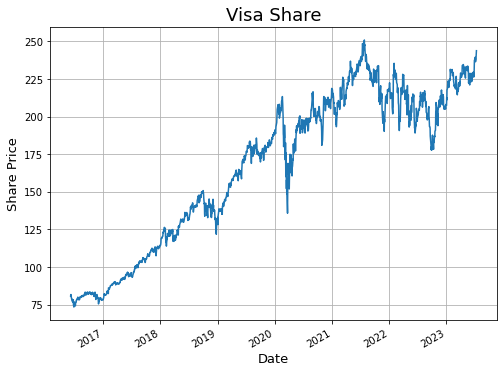

In [144]:
# Visualising the stock but with the improved x-axis
plt.xlabel(r"Time", fontsize=13)
plt.ylabel(r"Share Price", fontsize=13)
plt.title(r"Visa Share", fontsize=18)

# Plotting the data
ax = prices["V"].plot(figsize=(8, 6), grid=True)

### Explanation:
 - Now, the graph looks more descriptive and it shows the Visa share price change over the given time period
 - The x-axis clearly shows the years and share price on the y-axis
 - Interestingly, Visa seems to have a general upward trend from 2016 to 2023 with some major fluctuations in early 2020 (Covid time) and between 2021 and 2022

Now, the data is ready to start the exercises.

<br>

### Daily prices and daily log returns:

In [145]:
# Renaming the values and assigning into a new and more descriptive variable
visa_daily_prices = prices["V"]
visa_daily_prices

Date
2016-06-06     80.540001
2016-06-07     80.599998
2016-06-08     81.650002
2016-06-09     81.260002
2016-06-10     80.180000
                 ...    
2023-07-07    236.449997
2023-07-10    238.160004
2023-07-11    240.550003
2023-07-12    242.210007
2023-07-13    243.809998
Name: V, Length: 1788, dtype: float64

In [146]:
# Daily log returns for Visa:
daily_log_rets = np.diff(np.log(visa_daily_prices))
daily_log_rets

array([ 0.00074466,  0.01294321, -0.00478792, ...,  0.00998525,
        0.00687717,  0.00658408])

In [147]:
# Checking the size of the array
len(daily_log_rets)

1787

### Explanation of the above - Main points:
The three "blocks" of code above involve storing the daily prices of Visa in a new variable called **visa_daily_prices**. Then, perform the daily log-returns and store it in **daily_log_rets** variable. Finally, `len(daily_log_rets)` shows that the size of **daily log-returns** is one less than the size of the **daily returns**. 

This is expected as when computing log-returns it will return perform the following: $r_t = log(y_t) - log(y_{t-1})$, where $r_t$ represents the log return at some time $t$, and $log(y_t)$ and $log(y_{t-1})$ are the log-prices at $t$ and  $t_1$. This means we will not have the log return for the first data point which is on **"06-06-2016"** and the previous day **"05-06-2016"** as it is not present in the data set. Hence, the size is one less than daily prices.

<br>

In [148]:
# Creating a new DataFrame to show the daily returns of Visa over the between 2016-06-07 and 2023-07-13:

new_df = pd.DataFrame(daily_log_rets, index=dates[1:]) # Indexing from second date as there is no return for the first date - Length will be always one less than original size of the prices
new_df.set_index(pd.to_datetime(dates[1:]), inplace=True) # Setting the "new" dates as index 
new_df.rename(columns={0:"Visa_daily_log_returns"}, inplace=True) # Renaming the column

# Visualising the new Dataframe of Visa's daily log returns 
new_df

,Visa_daily_log_returns
Date,
2016-06-07,0.000745
2016-06-08,0.012943
2016-06-09,-0.004788
2016-06-10,-0.013380
2016-06-13,-0.022450
...,...
2023-07-07,-0.010225
2023-07-10,0.007206
2023-07-11,0.009985


In [149]:
# Creating a function which performs what done above with daily returns
def log_ret_dataframe_fixer(log_return_data, dates_column, column_name):
    new_df = pd.DataFrame(log_return_data, index=dates_column[1:]) # Indexing from second date as there is no return for the first date
    new_df.set_index(pd.to_datetime(dates_column[1:]), inplace=True) # Setting the "new" dates as index 
    new_df.rename(columns={0: column_name}, inplace=True) # Renaming the column
    return new_df # returning the new DataFrame

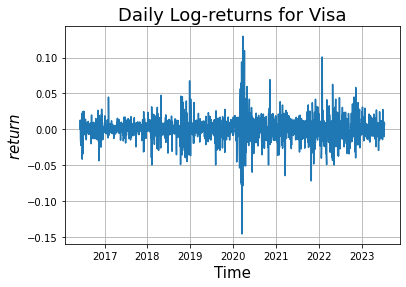

In [150]:
# Plotting the daily log returns over time

# Changing the font size and adding axis names, title and gridlines
plt.xlabel(r"Time", fontsize=15)
plt.ylabel(r"$return$", fontsize=15)
plt.title(r"Daily Log-returns for Visa", fontsize=18)
plt.grid()

# plotting the DataFrame
plt.plot(new_df)

### Explanation of the above - Main points:
After incorporating the daily log-returns and the corresponding dates in a new DataFrame called **new_df** and creating a function that can perform the first step efficiently, I have also plotted the daily log-returns for Visa. 

As a quick observation of the graph, it shows quite volatile log-returns from the last graph but to a _certain extent_ centered around 0.

<br>

### Testing for normality - Daily log-returns:

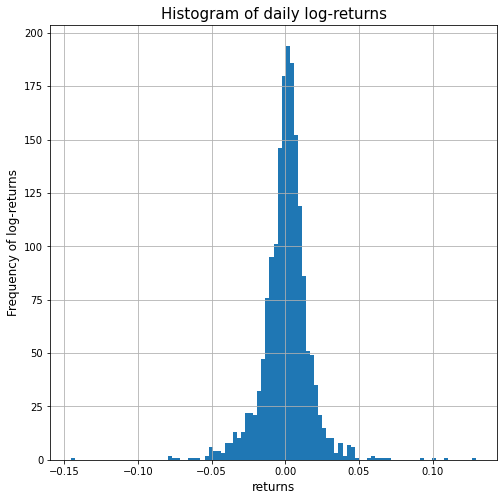

In [151]:
# Creating a histogram with the appropriate labeling and size
new_df.hist(figsize=(8,8), bins=100) # Choosing 100 bins
plt.title(r"Histogram of daily log-returns", fontsize=15)
plt.xlabel(r"returns", fontsize=12)
plt.ylabel(r"Frequency of log-returns", fontsize=12)

plt.show()

**Explanation**: As shown by the histogram above, the daily log-returns seem to have the shape of a bell curve and the data is centered around zero. However, this is not enough to determine whether the data is normally distributed or not. Also, the distribution has a peak higher than what is expected from a standard normal distribution as well as "heavier" tails. Next, we will look at other plot(s) and statistical tests.

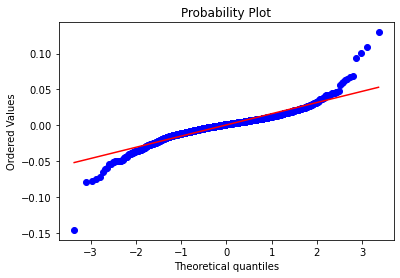

In [152]:
# importing new relevant modules for testing normality
import scipy as sp
import scipy.stats as stats

# Using the QQplot from scipy to see if data follows a normal distribution
qq_plot = stats.probplot(daily_log_rets, dist="norm", plot=plt)
plt.show()

**Explanation**: The QQplot gives a graphical assessment for normality. It tells us that if all the points (theoretically) fall on the red line then data is normally distributed. From the daily log returns data, most of the points fall very close to the line. However, the tails (extreme values) are noticeably far away from the red line which might suggest the data is not normally distributed. Next we will look at the Shapiro-Wilk test and explain the tests.

In [153]:
# Shapiro-Wilk test for normality:
# The null hypothesis is that the sample come form a normal distribution
# Alternative hypothesis is that it does not
stats.shapiro(daily_log_rets)

ShapiroResult(statistic=0.9013470411300659, pvalue=1.860822544904654e-32)

**Explanation**: The Shapiro-Wilk test helps us assess how close some data fit to a normal distribution. The null hypothesis is that the values are sampled from a population that follows a normal distribution and the alternative hypothesis is that they do not. If the p-value is larger than 0.05 we cannot reject the null hypothesis. Otherwise, if below 0.05 (at 95% confidence level), there would be evidence to reject the null hypothesis.

In our case, since the p-value is much smaller than 0.05, it suggests that there is overwhelming evidence against the null. So we would normally reject the null hypothesis and assume the data does not follow a normal distribution.

However, there are **limitations** to this test. When the sample data is relatively small then this test might not be accurate - not our case in this particular situation. But because our sample is over 1700 data points the test is likely to be very sensitive to minor deviation from the normal distribution. Ultimately, this means this test is not good for this particular scenario.

<br>

### Other Statistical tests using different methods:

**General approach for the next steps**: 
- Create my function for finding JB statistics and p-values to test normality with the bootstrap method
- Use the code from the lecture using Bootstrap and compare the results
- Give explanations/conclusions

The final test involves finding the **Jarque-Bera** test statistics and the p-value. This is because this statistics can be used as a goodness of fit test to assess if a sample data have the kurotsis and skewness matching a normal distribution. Let's see why:

The Jarque-Bera test statistic is computed as:

$$JB = \frac{n}{6} \times (S^2 + \frac{1}{4}(K-3)^2)$$
Where $S$ is the skewness and $K$ is the kurtosis.

The normal distribution has a skewness of 0 and a kurtosis of 3. This suggests if the sample has a JB statistic of zero or close to zero it shows some properties of the normal distribution. I said the word "properties" because even if we get a value of zero for the JB it doesn't strictly mean it follows a normal distribution but it shows only some characteristics of it. Also, in real life data are unlikely to have JB values of zero because of the random behaviour of data.

 However, instead of using the `scipy.stats.jarque_bera()` function directly from SciPy, this approach will involve creating the JB test and calculating the p-value from scratch using the **Bootstrapping** method. The reason for this is because `scipy.stats.jarque_bera()` assumes a data sample greater than 2000 to give a reliable output. However, **daily_log_rets** has just over 1700 data points.

#### Creating and using my function:

In [154]:
# importing the relevant packages
from scipy.stats import skew, kurtosis

# Creating a function for calculating the JB statistics
def jb_stats(data_sample): # Creating the formula for JB from scratch
    n = len(data_sample) # Length of the data set/empirical data
    s = skew(data_sample)
    k = kurtosis(data_sample)
    jb_stats_value = n / 6 * (s**2 + (0.25 * (k - 3)**2)) # JB formula from lecture notes
    return jb_stats_value # Returns JB of given data array

In [155]:
# Function for calculating p-value using bootstrapping
def jb_bootstrap_p_value(data_sample_jb_stat, data, bootstrap_replications=10000): # Chose a fixed 10000 for the replications for accuracy
    observed_stat = data_sample_jb_stat # Use the function above to calculate JB for some data and then store it here to use later

    bootstrap_jb_stats_lst = [] # Empty list to store the "simulated bootstrap"
    for item in range(bootstrap_replications): # Here, the intent is to bootstrap the returns/data, do this process 100000 times
        simulated_data = np.random.choice(data, size=len(data), replace=True) # Using "replace=True" because we want to "put back" the value
        jb_stat_simulated = jb_stats(simulated_data) # Using function created earlier to calculate JB for the simulation now
        bootstrap_jb_stats_lst.append(jb_stat_simulated)

    new_array = np.array(bootstrap_jb_stats_lst) # Transform list into an array
    p_value = np.mean(new_array >= observed_stat) # Please, read below for explanation of this line
    return p_value

### Explanation of the above function - Main points:
- **jb_stats(data_sample)** function will calculate the JB statistics given some data
- Whereas, **jb_bootstrap_p_value(data_sample_jb_stat, data, bootstrap_replications=10000)** ultimately calculates the p-value by using the Bootstrap method


The second function will calculate the JB statistics of the simulated data: To do so, the function will pick random data from the sample (daily log-returns) and calculate the JB statistics using the function created earlier. The process will include 10000 replications, appending the result each time to the list. Then, it will convert the list into an array of values.

Finally, since p-value is defined as "the probability under the assumption of no effect or no difference (null hypothesis), of obtaining a result equal to or more extreme than what was actually observed." - definition from the [National Institutes of Health](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/). In other words, the probability of finding results that are at least as extreme (or more) than the observed results when the null is true. Then, this is essentially what the function is doing on the second last line "**p_value = np.mean(new_array >= observed_stat)**". This gives an array of booleans where it is **True** each time the JB statistic of the simulated value is greater than the JB statistic of the actual data set, otherwise, it gives **False**. Essentially, comparing a list of simulated JBs against the JB from the original data set..Also, note that **True** corresponds to 1 and **False** to 0. The last step is to find the average amount of times where $JB_{simulated}$ > $JB_{observed}$.

**Additional Credits**: Used some of the idea/structure of this [Bootstrapping tutorial](https://www.youtube.com/watch?v=ec3yKFkcVh8). Not the same, but similar approach and adapted to this question.

**Important Note**: Although I am creating and using my own function to calculate the JB statistic and its p-value to use it in the questions, I will also use the lecture notes code in my analysis. When drawing conclusions I will put more weight in the code from the lecture slides but wanted to use mine to compare and see if the general they match.

In [156]:
# Computing Jarque-Bera for daily log returns for Visa for testing
jb_daily_log_returns = jb_stats(daily_log_rets)
jb_daily_log_returns

3516.3833971875943

Above, we can see the JB statistics generated is quite high. If computed correctly, it would suggest a departure from normality.

In [157]:
# Computing p-value of daily_log_returns using the function
p_value_daily_returns = jb_bootstrap_p_value(jb_daily_log_returns, daily_log_rets)

# Printing the p-value
print(f"p-value for Jarque-Bera test using Bootstrap method: {p_value_daily_returns}")

p-value for Jarque-Bera test using Bootstrap method: 0.4458


In [158]:
# Applying the Jarque-Bera test:
print(f"p-value of Jarque-Bera test using SciPy: ", stats.jarque_bera(daily_log_rets)[1])

p-value of Jarque-Bera test using SciPy:  0.0


**Explanation**: As shown above, the p-value for the JB test generated from the function is around 0.45 to 2 decimal places, which is above 0.05, suggesting there is no evidence against the null hypothesis. Hence, it would suggest the data is distributed normally. However, I have my doubts about the efficiency of my code and also when we look at the JB statistics, it is around 3500, very far from 0. Also, the p-value using SciPy gives zero. This must be because of the limitation caused by a sample size of less than 2000. However, before giving a conclusion I would like to use the code from the lectures to test this and as mentioned before, I will put more trust into the one from lecture slides.

However, before giving a conclusion I would like to use the code from the lectures slides to test this in case my code is not efficient.

#### Using the function from lectures:

**Reference**: Dr Bart de Keijzer. Statistics with SciPy(2023) - Rejecting the Null Hypothesis. 

I will use this tests also later on the coursework.

In [159]:
# Code from lectures with some minor changes
from scipy.stats import skew, kurtosis

def jb(n, s, k):
    return  n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)


def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=100000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)

# Returning the JB for daily log returns
jb_test(daily_log_rets)

(True, 7255.636337989451, 5.9198487951153025)

The result of the code from lectures tells us that the empirical Jarque-Bera is greater than the critical value, by a large margin. This means we need to reject the null hypothesis about the data following a normal distribution.

Also, I can see that the empirical JB statistic from lecture slides is around **7255.64** and the one generated from my code is **3516.39**. This is a significant difference and an important observation to make because it can affect future analysis. As mentioned I will use both but will keep this in mind and put emphasis on the result generated from the lecture slides code. 

**Conclusion**: Because we are using real-life data, it is very unlikely that data (daily log-returns) will be _perfectly_ normally distributed. So, if we are looking for a perfect bell curve then no, the daily log returns are not (perfectly) normally distributed. But it is difficult to say with certainty.

But if I were in a situation where I would need to do further analysis in an industry setting, then I would be satisfied with the shape of the data and would assume normality since it would be very difficult to look for perfect bell curves in real life. It really comes down to how strict you want to be in your assumptions and what your goals/further steps are.

Also, considering that the sample size is quite large, the test is very sensitive to minor deviation from the normal distribution in the case of the Shapiro-Wilk test and looking at the distribution graph it does resemble a bell shape. This is why we need to be cautious with using test statistics as they have their own limitations.

Ultimately, I should have used one test statistic/method but I was really curious to see the results of implementing them all and also I was not sure which one was being asked from the question.

<br>

### Monthly prices and daily log returns:

#### Data analysis and manipulation:

Now, doing what have done previously for daily prices for monthly prices.

In [160]:
# Slicing Visa monthly prices for Visa
visa_monthly_prices = visa_daily_prices.resample("M").last()
visa_monthly_prices

Date
2016-06-30     74.169998
2016-07-31     78.050003
2016-08-31     80.900002
2016-09-30     82.699997
2016-10-31     82.510002
                 ...    
2023-03-31    225.460007
2023-04-30    232.729996
2023-05-31    221.029999
2023-06-30    237.479996
2023-07-31    243.809998
Freq: M, Name: V, Length: 86, dtype: float64

In [161]:
# Tipically I use similar font size and "formatting" for my graphs, so I am creating a function that saves me time from now on
def figure_plotter(data, x_title, y_title, main_title):
    plt.xlabel(x_title, fontsize=13)
    plt.ylabel(y_title, fontsize=13)  # Using f-string and raw string for LaTeX-like formatting
    plt.title(main_title, fontsize=18)
    plt.grid()
    return plt.plot(data)

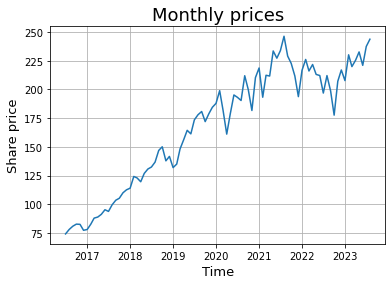

In [162]:
# Using the function created earlier to plot the monthly prices
monthly_prices_graph = figure_plotter(visa_monthly_prices, "Time", "Share price", "Monthly prices") 
monthly_prices_graph

In [163]:
# Selecting the monthly dates
monthly_dates = visa_monthly_prices.index
monthly_dates

DatetimeIndex(['2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
               '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
      

In [164]:
# Computing monthly log returns for Visa and checking:
monthly_log_rets = np.diff(np.log(visa_monthly_prices))
monthly_log_rets

array([ 0.05098996,  0.03586416,  0.02200572, -0.00230004, -0.06496687,
        0.00901251,  0.05837534,  0.06131429,  0.01051987,  0.02609953,
        0.04302087, -0.01534345,  0.05980885,  0.03900435,  0.01647864,
        0.04405513,  0.02345431,  0.01262097,  0.08576087, -0.01043826,
       -0.02737638,  0.05892166,  0.0298159 ,  0.01314755,  0.03187616,
        0.07160265,  0.02155109, -0.08506891,  0.02761658, -0.07143547,
        0.02300152,  0.09267391,  0.05305051,  0.05141167, -0.01903294,
        0.07301379,  0.02531779,  0.01571855, -0.04994952,  0.0390508 ,
        0.03110025,  0.01820624,  0.05724419, -0.09046696, -0.12053771,
        0.10367094,  0.08840926, -0.01065898, -0.01444353,  0.10741204,
       -0.05837177, -0.09575531,  0.14636079,  0.03906523, -0.12385339,
        0.09443952, -0.00311235,  0.09812714, -0.02716825,  0.02828088,
        0.05236402, -0.07275703, -0.02810855, -0.05054927, -0.08882889,
        0.11188817,  0.04272684, -0.04545313,  0.02580704, -0.03

In [165]:
# Turning into a DaTaframe and setting the index and correctly naming the column using the function
monthly_log_ret_df = log_ret_dataframe_fixer(monthly_log_rets, monthly_dates, "Visa_monthly_log_returns")
monthly_log_ret_df

,Visa_monthly_log_returns
Date,
2016-07-31,0.050990
2016-08-31,0.035864
2016-09-30,0.022006
2016-10-31,-0.002300
2016-11-30,-0.064967
...,...
2023-03-31,0.024788
2023-04-30,0.031736
2023-05-31,-0.051581


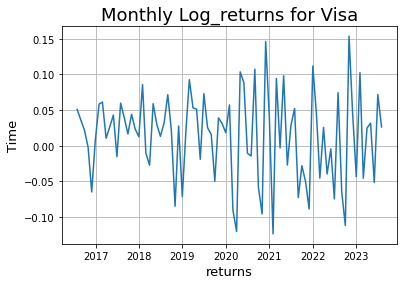

In [166]:
# Let's see the monthly log-returns over time
monthly_log_plot = figure_plotter(monthly_log_ret_df, "returns", "Time", "Monthly Log_returns for Visa")

As we can see, the returns are still relatively volatile but much less compared to the daily log returns seen earlier. But now, it is not centered around zero as it much it used to in the daily log-return graph.

### Testing for normality - Monthly log-returns:

#### Histogram:

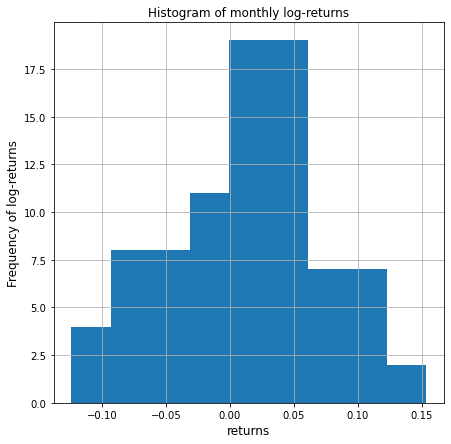

In [167]:
# Creating a histogram
monthly_log_ret_df.hist(figsize=(7,7), bins="rice") # I found out about this interesting "rice" criterion on the web
plt.title(r"Histogram of monthly log-returns", fontsize=12)
plt.xlabel(r"returns", fontsize=12)
plt.ylabel(r"Frequency of log-returns", fontsize=12)

plt.show()

**Explanation**: As shown by the histogram above, the monthly log-returns are not exactly smooth like a bell curve but we need to consider that we have fewer data points now. But we could also argue that, although it is not as smooth, the shape goes "close" to a normal distribution. This is difficult to determine, so we will check a QQ plot next.

**Note**: I found a nice page which talks about how many bins to use for histograms [here](https://www.yourdatateacher.com/2021/11/22/how-to-choose-the-bins-of-a-histogram/), and decided to try it. I have also changed it for the daily log return histogram and it looks better.

#### QQ-plot:

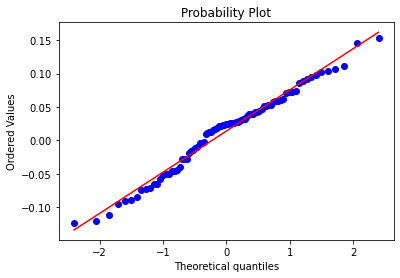

In [168]:
# Now using a qqplot
qq_plot = stats.probplot(monthly_log_rets, dist="norm", plot=plt)
plt.show()

**Explanation**: This is interesting, the QQ plot for the **monthly log-returns** have most of the points on the line red line or very close to it, including the tails. The only concern would be slight curvature in the middle but other than that, it seems to suggest normality.

One possible reason for this could because by taking less points (greater time steps) compared to daily returns, some of the noise from daily (fast) market movements are smoothened out.

#### Statistical tests and analysis:

Now I will try the Shapiro-Wilk test. This tests is suitable for monthly log returns because the test when the sample size is around $n=50$. Although, we have 85 data points which is slightly above 50, it is still resonable to use this test as the difference is not too large. 

In [169]:
# Shapiro-Wilk test on monthly log-returns
stats.shapiro(monthly_log_rets)

ShapiroResult(statistic=0.9804891347885132, pvalue=0.22608131170272827)

**Explanation**: The p-value is 0.2261 to 2 decimal places, which is above 0.05. This means there is no evidence against the null hypothesis, suggesting normality. Also, because of the sample size, this Shapiro-Wilk test is more reliable here than for the daily log-returns one.

**Note**: I am not sure if for this exercise doing all these tests is necessary or not but I want to include the other tests just for completeness and then provide a summary explanation/conclusion.

In [170]:
# Jarque-Bera Test
print(f"The p-value for the Jarque-Bera test is:", stats.jarque_bera(monthly_log_rets)[1])

The p-value for the Jarque-Bera test is: 0.5370347665835417


In [171]:
# Computing Jarque-Bera for monthly log returns for Visa for testing
jb_monthly_log_returns = jb_stats(monthly_log_rets)
jb_monthly_log_returns

40.48204492125358

We can see the JB statistics getting lower compared to the daily data but not "close enough" to zero to suggest perfect normality characteristics in my opinion.

In [172]:
# Computing p-value of monthly_log_returns using my function
p_value_monthly_returns = jb_bootstrap_p_value(jb_monthly_log_returns, monthly_log_rets)

# Printing the p-value
print(f"p-value for Jarque-Bera test using my Bootstrap method: {p_value_monthly_returns}")

p-value for Jarque-Bera test using my Bootstrap method: 0.5776


In [173]:
# Using the function from lecture notes
jb_test(monthly_log_rets)

(False, 1.2433848886554573, 5.408047695727874)

### Explanation of the above - Main points:
- As mentioned, the Jarque-Bera tests from `scipy.stats.jarque_bera()` is not going to give accurate result (small sample size), I just kept it to see the output
- The p-value for Jarque-Bera using the Bootstrap method is around 0.57 to 2 decimal places, this suggests no evidence against the null
- The test using the code from the lecture also tells us that the empirical Jarque-Bera is less than the critical value, so no evidence against the null

Note that the null hypothesis is that the data follows a normal distribution.

**Conclusion**: Monthly log-return data seems to be normally distributed from the graphs, plots and some of the tests. 

<br>

### Annual prices and annual log returns:

**Note**: The following steps are going to be "faster" and only with the explanation/conclusion at the end since we have been doing this for daily and monthly data and it's just a repetition.

#### Data analysis and manipulation:

In [174]:
# Slicing Visa yearly prices for Visa
visa_yearly_prices = visa_daily_prices.resample("BY").last() # Chose "Business year end frequency"
visa_yearly_prices

Date
2016-12-30     78.019997
2017-12-29    114.019997
2018-12-31    131.940002
2019-12-31    187.899994
2020-12-31    218.729996
2021-12-31    216.710007
2022-12-30    207.759995
2023-12-29    243.809998
Freq: BA-DEC, Name: V, dtype: float64

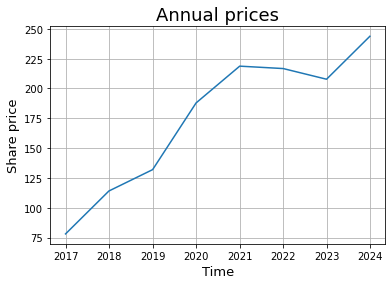

In [175]:
# Yealy prices graph
yearly_prices_graph = figure_plotter(visa_yearly_prices, "Time", "Share price", "Annual prices") 
yearly_prices_graph

In [176]:
# Yearly log returns for Visa:
yearly_log_rets = np.diff(np.log(visa_yearly_prices))
yearly_log_rets

array([ 0.37940868,  0.14597345,  0.35356258,  0.1519282 , -0.00927799,
       -0.04217654,  0.16000568])

In [177]:
# Getting yearly dates
yearly_dates = visa_yearly_prices.index
yearly_dates

DatetimeIndex(['2016-12-30', '2017-12-29', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-30', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', freq='BA-DEC')

In [178]:
# Turning into a DaTaframe and setting the index and correctly naming the column - using my function
yearly_log_ret_df = log_ret_dataframe_fixer(yearly_log_rets, yearly_dates, "Visa_annual_log_returns")
yearly_log_ret_df

,Visa_annual_log_returns
Date,
2017-12-29,0.379409
2018-12-31,0.145973
2019-12-31,0.353563
2020-12-31,0.151928
2021-12-31,-0.009278
2022-12-30,-0.042177
2023-12-29,0.160006


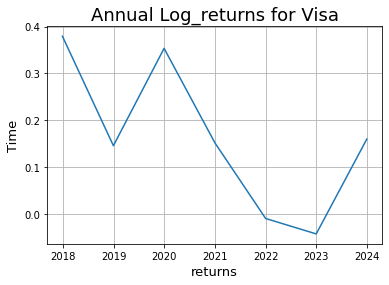

In [179]:
# Let's see the yearly log-returns over time
yearly_log_plot = figure_plotter(yearly_log_ret_df, "returns", "Time", "Annual Log_returns for Visa")

**Explanation**: There are very few points here to draw solid conclusions.

### Testing for normality - Annual log-returns:

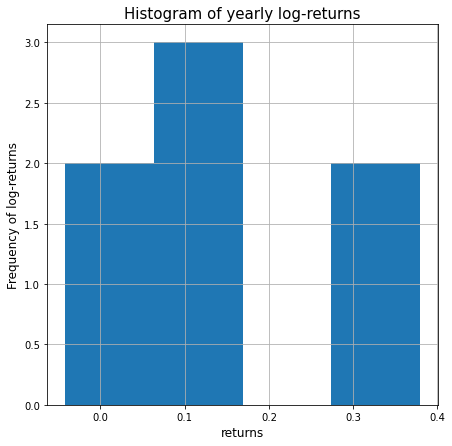

In [180]:
# Creating a histogram
yearly_log_ret_df.hist(figsize=(7,7), bins="rice") # I found out about this interesting "rice" criterion on the web
plt.title(r"Histogram of yearly log-returns", fontsize=15)
plt.xlabel(r"returns", fontsize=12)
plt.ylabel(r"Frequency of log-returns", fontsize=12)

plt.show()

**Explanation**: Again, it is difficult to conclude with very few points but the histogram not look normal.

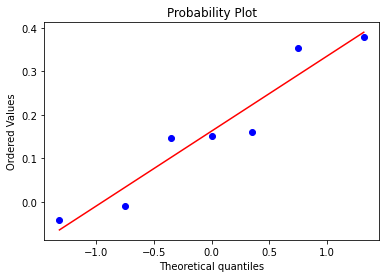

In [181]:
# Now using a qqplot
qq_plot = stats.probplot(yearly_log_rets, dist="norm", plot=plt)
plt.show()

### Explanation of the above - Main points:
 - By Performing similar as done for daily and monthly prices we generated the histogram and QQ plot
 - Neither of them sugest for normality which is expected for the very few data points we have
 - The QQ plot have the points relatively close to the line but there are very few of them to determine normality this way
 - No need for the statistical tests

**Conclusion**:  Annual log-returns are not normally distributed. Using the tests (Bootstrap methods and in-built functions) will not give an accurate result because of the very small sample size. Bootstrap methods will have very little "variation" in the simulated data which will influence in effectiveness of the test(s) this is why I chose to skip them for this frequency. **Note**: There will be a better explanation at the end of **Exercise 3** for this, but it is the same idea.

In summary, it becomes very difficult to determine if some data is normally distributed having only 7 data points, like this situation. My answer would be that we cannot say for sure. Both statistical tests and plots lack the effectiveness in telling us if the data follows a normal distribution or not, we need more data to say that with more confidence. But, with the given data I would say no. 

<br>

## Exercise 2:

**Important Note**: In this question, I assumed we were required to use a combination of the different topics learned in lectures to show our understanding of them, analysing results and potential issues with the methods used rather than just focusing on code efficiency.

In [182]:
# Using the function created earlier to adjust the DataFrame
dates = prices["Date"] # This variable was already created but just put it here again to make it clear for the reader
prices_adjusted_df = index_fixer(prices, dates, "Date")

In [183]:
# Checking the new DataFrame
prices_adjusted_df

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-06,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,160.190002,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
2016-06-07,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,158.889999,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2016-06-08,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,158.000000,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
2016-06-09,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,156.779999,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
2016-06-10,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,154.779999,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,190.679993,35.900002,29.100000,42.770000,153.490005,103.160004,106.349998,485.269989,58.200001,218.649994,...,138.970001,274.429993,173.699997,461.579987,202.820007,179.759995,33.540001,236.449997,135.500000,305.760010
2023-07-10,188.610001,35.139999,29.790001,42.320000,154.880005,104.690002,107.019997,496.350006,58.080002,224.729996,...,138.339996,269.609985,179.440002,463.049988,204.860001,181.330002,33.740002,238.160004,134.490005,308.450012
2023-07-11,188.080002,34.990002,30.570000,42.740002,154.649994,105.970001,107.500000,504.739990,58.750000,223.860001,...,140.020004,269.790009,178.820007,462.890015,206.789993,185.240005,34.919998,240.550003,135.570007,309.720001


Seems correct, with one less column than the original data as the date column one has been made into the index and removed. Now, going to calculate, daily log-returns for all the stocks.

### Daily data - analysis:

In [184]:
# Creating daily log returns for all stocks and visualising them
daily_log_rets_all = np.diff(np.log(prices_adjusted_df), axis=0) # It is necessary to perform the operation on the columns, this si why "axis=0"
daily_log_rets_all

array([[ 0.00404738,  0.02030132,  0.00583091, ...,  0.00074466,
         0.00444726,  0.000418  ],
       [-0.00090919, -0.00445434,  0.00403633, ...,  0.01294321,
        -0.02195072, -0.00276187],
       [ 0.00715043,  0.00831164, -0.0054276 , ..., -0.00478792,
        -0.01600295,  0.00100522],
       ...,
       [-0.00281398, -0.00427771,  0.02584633, ...,  0.00998525,
         0.00799828,  0.00410887],
       [ 0.00894542, -0.0037223 , -0.00821158, ...,  0.00687717,
        -0.00436158,  0.0133421 ],
       [ 0.00473134, -0.00748642, -0.01948273, ...,  0.00658408,
        -0.01035121,  0.0049736 ]])

In [185]:
# Creating a function similar to the one in Exercise 1 to fix the data frames for multi-dimentional data 
def multi_dim_data_frame_fixer(log__ret_df, dates_df):
    df = pd.DataFrame(log__ret_df, index=dates_df[1:]) # Creating the data frame
    df.set_index(pd.to_datetime(dates_df[1:]), inplace=True) # Setting the index correctly to the  appropriate dates 
    df.columns = prices.columns[1:] # Fixing the column names
    return df

# Using the function for daily stocks log returns data frame
daily_log_rets_all_df = multi_dim_data_frame_fixer(daily_log_rets_all, dates)
daily_log_rets_all_df

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-07,0.004047,0.020301,0.005831,-0.004367,-0.000282,0.015218,-0.006146,-0.006072,-0.004023,-0.008148,...,0.015436,0.051488,0.004396,-0.008797,0.008256,0.007344,-0.005144,0.000745,0.004447,0.000418
2016-06-08,-0.000909,-0.004454,0.004036,-0.005385,0.003513,0.000882,-0.000514,0.001623,-0.002457,-0.005617,...,0.003879,0.013594,0.008412,0.024953,0.016647,0.007863,0.003510,0.012943,-0.021951,-0.002762
2016-06-09,0.007150,0.008312,-0.005428,-0.017350,-0.002669,-0.001323,-0.001029,-0.006201,-0.014511,-0.007751,...,-0.019083,-0.026503,0.000966,0.001992,0.003923,0.002671,-0.006327,-0.004788,-0.016003,0.001005
2016-06-10,-0.008263,0.013764,0.042860,-0.016414,0.000703,-0.007639,-0.012165,-0.010043,-0.019984,-0.012839,...,-0.027057,-0.047180,-0.003708,-0.010289,-0.006847,-0.004296,-0.013728,-0.013380,0.004107,-0.009844
2016-06-13,-0.015191,-0.001900,0.022659,-0.007684,-0.008612,0.006756,-0.014162,-0.001340,-0.010787,-0.011044,...,0.003333,-0.004214,-0.006157,-0.008293,-0.000789,-0.008455,-0.006695,-0.022450,-0.017697,-0.010113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,-0.005909,-0.033688,-0.000344,-0.002802,-0.023311,0.002329,-0.007961,0.008235,0.010363,-0.019610,...,-0.001366,-0.007659,-0.006427,-0.016715,0.001530,0.002674,0.016534,-0.010225,-0.012832,-0.007202
2023-07-10,-0.010915,-0.021397,0.023435,-0.010577,0.009015,0.014722,0.006280,0.022576,-0.002064,0.027427,...,-0.004544,-0.017720,0.032511,0.003180,0.010008,0.008696,0.005945,0.007206,-0.007482,0.008759
2023-07-11,-0.002814,-0.004278,0.025846,0.009876,-0.001486,0.012152,0.004475,0.016762,0.011470,-0.003879,...,0.012071,0.000667,-0.003461,-0.000346,0.009377,0.021334,0.034376,0.009985,0.007998,0.004109


Let's do a "sanity" check to see if the data we have now is valid. To do this, I am going to compare the daily log returns of Visa from **Exercise 1** to the ones for Visa in this data frame. If the values are the same, this means we are in the right direction.

In [186]:
# Compare returns of the visa return in the DataFrame with all the stocks with the daily-log returns computed at the beginning
daily_log_rets_all_df["V"] == daily_log_rets

Date
2016-06-07    True
2016-06-08    True
2016-06-09    True
2016-06-10    True
2016-06-13    True
              ... 
2023-07-07    True
2023-07-10    True
2023-07-11    True
2023-07-12    True
2023-07-13    True
Name: V, Length: 1787, dtype: bool

**Explanation**: Since comparing the return of the daily log returns of the Visa from **Exercise** 1 and the column of the last DataFrame which corresponds to Visa gives all "True" it means we did the computation correctly.

**Plan**: To compute the Jarque-Bera and p-value for daily log-returns for all stocks I will use two approaches/methods. I will explain why this later.
First, I will use the bootstrap function I created in a `for-loop` to generate and append the values into two lists, one for the Jarque-Bera statistic and the other for their respective p-value. Then, I will generate box-plots.
After, I will use the in-built function `.jarque_bera()` from `SciPy` in combination with a loop to generate the values of interest. However, I am aware of the limitations of using this function with sample sizes less than 2000 but I wanted to see the difference.

**Note 1**: Because **Exercise 2** is the last exercise I am doing, it might look strange to not use some function created earlier in later questions. I will try my best to change before the deadline but please keep this in mind. 

**Note 2**:  I will keep my bootstrap replications to 500 because for higher replications I noticed the program runs significantly slower and the improvement in the accuracy will not be significant (in my opinion in this case). But feel free to change this to a lower value if you need for timings, 500 does not take too long.

In [187]:
# Using my bootstrap to generate the JBs and p-values
daily_jb_stocks_lst = [] # JB of stocks list
daily_p_value_stocks_lst = [] # p-values of stocks list

for stock in daily_log_rets_all_df.columns:
    jb_stock = jb_stats(daily_log_rets_all_df[stock]) # Generating the JB statistic for the specific iteration using my function
    p_value_stock = jb_bootstrap_p_value(jb_stock, daily_log_rets_all_df[stock], bootstrap_replications=500) # Generating the p-value for the specific iteration  
    daily_jb_stocks_lst.append(jb_stock)
    daily_p_value_stocks_lst.append(p_value_stock)

**Note**: I set the bootstrap replication to 500 because it reduces the execution time without affecting it too much the accuracy. Ideally, I would have done more replications for even greater accuracy but for illustration purposes, I decided to keep this amount.

**Note**: Feel free to jump to "Combined functions" just before the **Monthly data - manipulation and analysis** section and skip these box-plots. Here, I was just trying to check if the analysis seems correct or if there is something that looks "strange". You can skip this but it just shows my thinking process.

<AxesSubplot:title={'center':'Jarque-Bera Box-plot'}, xlabel='daily-log retuen for all stocks'>

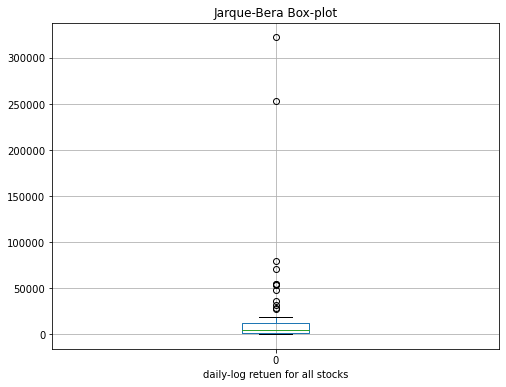

In [188]:
# Let's generate a box plot for the daily JB with outliers
plt.figure(figsize=(8, 6))
plt.title("Jarque-Bera Box-plot")
plt.xlabel("daily-log retuen for all stocks")
pd.DataFrame(daily_jb_stocks_lst).boxplot()

We can see a lot of outliers in the data and it makes it difficult to visualise the data, let's see the box plot without them.

<AxesSubplot:title={'center':'Jarque-Bera Box-plot - Bootstrap'}, xlabel='daily-log return for all stocks'>

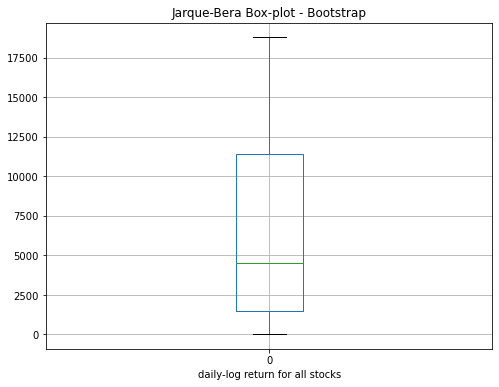

In [189]:
# Same but without outliers
plt.figure(figsize=(8, 6))
plt.title("Jarque-Bera Box-plot - Bootstrap")
plt.xlabel("daily-log return for all stocks")
pd.DataFrame(daily_jb_stocks_lst).boxplot(showfliers=False)

As we can see the JB values are very high for the bootstrap method, suggesting departure from normality. This is not explicitly asked to do but I wanted to just check.

Previously, I used my own bootstrap function to calculate the values, now I will the in-built function from `SciPy`.

In [190]:
# Now doing the same but using the in-built function, SciPy
daily_jb_stocks_lst2 = [] # JB of stocks list
daily_p_value_stocks_lst2 = [] # p-values of stocks list

# Comments here the same as previous
for stock in daily_log_rets_all_df.columns:
    jb_stock = stats.jarque_bera(daily_log_rets_all_df[stock])[0] # Using the in-built function here
    pval = stats.jarque_bera(daily_log_rets_all_df[stock])[1] # and here
    daily_jb_stocks_lst2.append(jb_stock)
    daily_p_value_stocks_lst2.append(pval)

<AxesSubplot:title={'center':'Jarque-Bera Box-plot - SciPy'}, xlabel='daily-log returns for all stocks'>

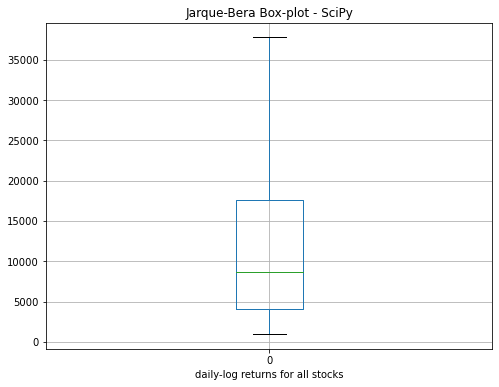

In [191]:
# Let's generate a box plot for the daily JB withouth outliers using the in-built function
plt.figure(figsize=(8, 6))
plt.title("Jarque-Bera Box-plot - SciPy")
plt.xlabel("daily-log returns for all stocks")
pd.DataFrame(daily_jb_stocks_lst2).boxplot(showfliers=False)

For this, I have plotted the one without outliers directly to have a better visualisation. The JBs have a larger range with the in-built function and are still high, much higher than 0, which suggests a departure from normality in general.

Before moving on to monthly data, I will create a function to incorporate both methods to calculate the JB statistics and p-values into one function based on the `method` parameter given. The `method`  will take either **boot** or **scipy** depending on which technique we want to apply. Also, creating a function to generate "default" box-plots.

In [192]:
# Combined function
def statistic_jb_pval_method(data_frame, method):
    jb_lst = []
    p_val_lst = []
    # Most of the function is the same as the previous, so will not comment much here, refer at previous versions please
    if method.lower() == "boot": # When we choose bootstrap method
        for stock in data_frame.columns:
            jb_stock = jb_stats(data_frame[stock]) 
            p_value_stock = jb_bootstrap_p_value(jb_stock, data_frame[stock], bootstrap_replications=500)  
            jb_lst.append(jb_stock)
            p_val_lst.append(p_value_stock)
        return (jb_lst, p_val_lst)
    
    elif method.lower() == "scipy": # When we choose in-built function
        for stock in data_frame.columns:
            jb_stock = stats.jarque_bera(data_frame[stock])[0]
            p_value_stock = stats.jarque_bera(data_frame[stock])[1]
            jb_lst.append(jb_stock)
            p_val_lst.append(p_value_stock)
        return (jb_lst, p_val_lst)
    else:
        return "Method given is not correct. Please, choose between 'boot' for bootstrapping or 'scipy' for the in-built function."
    

# Also creating a function that plots the box-plot with default sizes
def boxplot_plotter(data, x_title, y_title, main_title, outliers=True):
    plt.figure(figsize=(8, 6))
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title, fontsize=13)
    plt.title(main_title, fontsize=18)
    plot = pd.DataFrame(data).boxplot(showfliers=outliers)
    return plot

### Monthly data - manipulation and analysis:

Since we have seen the general approach for this question, now we will do the coding and then exaplain at the end.

In [193]:
# Using less repetition:

# Getting the monthly data from the data frame earlier
monthly_adjusted_df = prices_adjusted_df.resample("M").last()

# Creating monthly log returns for all stocks 
monthly_log_rets_all = (np.diff(np.log(monthly_adjusted_df), axis=0)) # It is necessary to perform the operation on the columns, this si why "axis=0"

# Using my function to generate a data frame for monthly data
monthly_log_rets_all_df = multi_dim_data_frame_fixer(monthly_log_rets_all, monthly_dates)

In [194]:
# Checking the Visa log returns with new data frame with the one in exercise 1, if most are True then should be fine
monthly_log_rets_all_df["V"] == monthly_log_rets

Date
2016-07-31    True
2016-08-31    True
2016-09-30    True
2016-10-31    True
2016-11-30    True
              ... 
2023-03-31    True
2023-04-30    True
2023-05-31    True
2023-06-30    True
2023-07-31    True
Freq: M, Name: V, Length: 85, dtype: bool

#### Using my function:

In [195]:
# Generating monthly JBs and p-values with bootstrap method - Feel free to change boostrap replication number to run it quicker
monthly_jb_bootstrap = statistic_jb_pval_method(monthly_log_rets_all_df ,"boot")[0] # JB values
monthly_pvalue_bootstrap = statistic_jb_pval_method(monthly_log_rets_all_df, "boot")[1] # P-values

#### Using the in-built function, SciPy:

In [196]:
# Generating monthly JBs and p-values with SciPy
monthly_jb_function = statistic_jb_pval_method(monthly_log_rets_all_df ,"scipy")[0] # JB values
monthly_pvalue_function = statistic_jb_pval_method(monthly_log_rets_all_df, "scipy")[1] # P-values

### Annual data - manipulation and analysis:

Let's do the same for annual data.

In [197]:
# Getting the annual data from the data frame earlier
yearly_adjusted_df = prices_adjusted_df.resample("BY").last()

# Creating annual log returns for all stocks 
yearly_log_rets_all = (np.diff(np.log(yearly_adjusted_df), axis=0)) # It is necessary to perform the operation on the columns, this si why "axis=0"

# Using my function to generate a data frame for monthly data
yearly_log_rets_all_df = multi_dim_data_frame_fixer(yearly_log_rets_all, yearly_dates)

In [198]:
# Checking against first exercise
yearly_log_rets_all_df["V"] == yearly_log_rets

Date
2017-12-29    True
2018-12-31    True
2019-12-31    True
2020-12-31    True
2021-12-31    True
2022-12-30    True
2023-12-29    True
Freq: BA-DEC, Name: V, dtype: bool

In [199]:
# Doing the same as monthly for yearly now

# Generating monthly JBs and p-values with bootstrap method
yearly_jb_bootstrap = statistic_jb_pval_method(yearly_log_rets_all_df ,"boot")[0] # JB values
yearly_pvalue_bootstrap = statistic_jb_pval_method(yearly_log_rets_all_df, "boot")[1] # P-values

# Generating monthly JBs and p-values with SciPy
yearly_jb_function = statistic_jb_pval_method(yearly_log_rets_all_df ,"scipy")[0] # JB values
yearly_pvalue_function = statistic_jb_pval_method(yearly_log_rets_all_df, "scipy")[1] # P-values

### Box-plots - Side-by-side:

#### 1. Bootstrap:

In [200]:
# Combining the lists/array into one dataframe
combined_jb_df = pd.concat([pd.DataFrame(daily_jb_stocks_lst), pd.DataFrame(monthly_jb_bootstrap),
                            pd.DataFrame(yearly_jb_bootstrap)], axis=1)
combined_jb_df.columns = ["Daily", "Monthly", "Yearly"]
combined_jb_df

,Daily,Monthly,Yearly
0,559.621612,41.631339,4.864953
1,233.164776,47.001365,4.355490
2,1021.540561,26.603116,3.457193
3,2364.294203,10.155158,3.895991
4,12599.513035,16.932086,5.404310
...,...,...,...
96,3278.494049,20.887263,5.252354
97,5438.065234,19.976649,6.084337
98,3516.383397,40.482045,5.196687
99,12740.900332,22.204782,4.684768


<AxesSubplot:title={'center':'Jarque-Bera: Bootstrap'}, xlabel='JB statistics', ylabel='Frequency'>

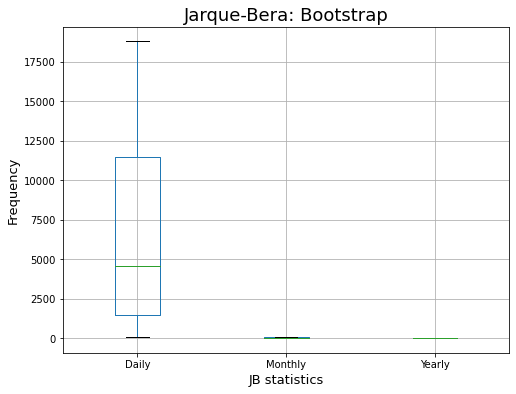

In [201]:
# Plotting them
boxplot_plotter(combined_jb_df, "JB statistics", "Frequency", "Jarque-Bera: Bootstrap", False)

#### 2. SciPy Method:

In [202]:
# Combining the lists/array into one data frame
combined_jb_df2 = pd.concat([pd.DataFrame(daily_jb_stocks_lst2), pd.DataFrame(monthly_jb_function),
                            pd.DataFrame(yearly_jb_function)], axis=1)
combined_jb_df2.columns = ["Daily", "Monthly", "Yearly"]
combined_jb_df2

,Daily,Monthly,Yearly
0,2439.961203,2.313205,0.766756
1,1690.154729,2.311690,0.410939
2,3267.973441,1.203438,0.922971
3,5534.847989,18.662609,0.166364
4,19080.764191,10.886206,0.611994
...,...,...,...
96,6892.831103,1.330387,0.472806
97,9913.894501,37.140526,0.891220
98,7255.636338,1.243385,0.452813
99,19163.769186,0.946045,0.301005


<AxesSubplot:title={'center':'Jarque-Bera: SciPy Function'}, xlabel='JB statistics', ylabel='Frequency'>

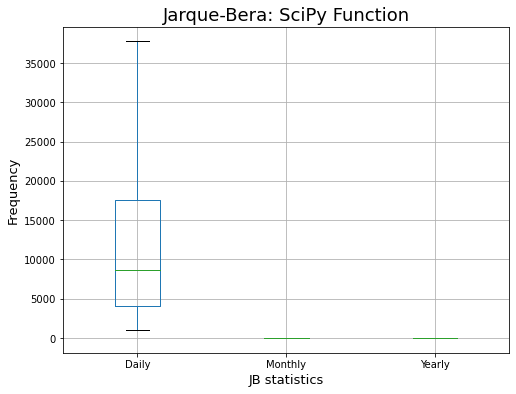

In [203]:
# Plotting the box plot together from the Scipy function
boxplot_plotter(combined_jb_df2, "JB statistics", "Frequency", "Jarque-Bera: SciPy Function", False)

Both the box plots for the Jarque-Bera statistics are very hard to read. Next, I will do side-by-side plots for the Jarque-Bera test statistic as asked. But a pattern we can see is that for monthly and annual the JB values are much smaller compared to the annual ones.

#### Side-to-side plots:

I will show the one which uses the `.jarque_bera()` from `SciPy` first and then the one from my bootstrap function. I want to see if the general pattern reamins even if the methods and values are different.

Let's see the ones  for the `SciPy` function with outliers first.

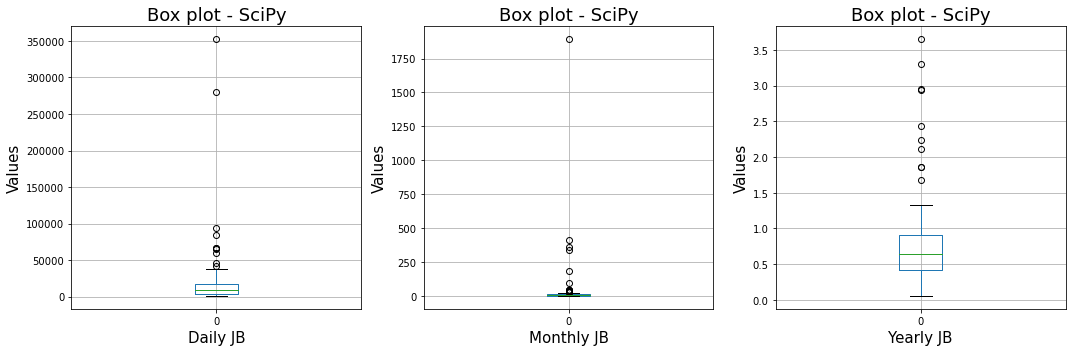

In [204]:
# Creating variables for each frequency of the JB
x = pd.DataFrame(daily_jb_stocks_lst2)
y = pd.DataFrame(monthly_jb_function)
z = pd.DataFrame(yearly_jb_function)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plotting boxplots separately for each DataFrame's columns without outliers

# Box plot for daily data
x.boxplot(ax=axs[0])
axs[0].set_title("Box plot - SciPy", fontsize=18)
axs[0].set_xlabel("Daily JB", fontsize=15)
axs[0].set_ylabel("Values", fontsize=15)

# Box plot for monthly data
y.boxplot(ax=axs[1])
axs[1].set_title("Box plot - SciPy", fontsize=18)
axs[1].set_xlabel("Monthly JB", fontsize=15)
axs[1].set_ylabel("Values", fontsize=15)

# Box plot for annual data
z.boxplot(ax=axs[2])
axs[2].set_title("Box plot - SciPy", fontsize=18)
axs[2].set_xlabel("Yearly JB", fontsize=15)
axs[2].set_ylabel("Values", fontsize=15)

# Make them more spacious
plt.tight_layout()
plt.show()

The plots abover are hard to see, let's see the ones without outliers.

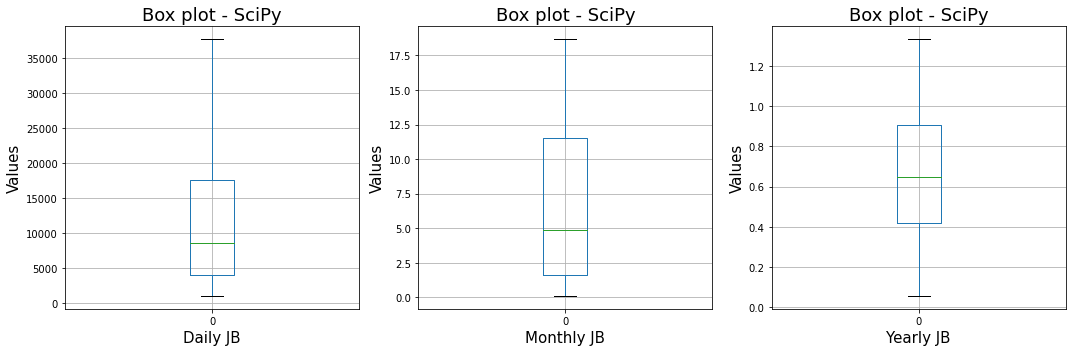

In [205]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plotting boxplots separately for each DataFrame's columns without outliers

# Box plot for daily data
x.boxplot(ax=axs[0], showfliers=False)
axs[0].set_title("Box plot - SciPy", fontsize=18)
axs[0].set_xlabel("Daily JB", fontsize=15)
axs[0].set_ylabel("Values", fontsize=15)

# Box plot for monthly data
y.boxplot(ax=axs[1], showfliers=False)
axs[1].set_title("Box plot - SciPy", fontsize=18)
axs[1].set_xlabel("Monthly JB", fontsize=15)
axs[1].set_ylabel("Values", fontsize=15)

# Box plot for annual data
z.boxplot(ax=axs[2], showfliers=False)
axs[2].set_title("Box plot - SciPy", fontsize=18)
axs[2].set_xlabel("Yearly JB", fontsize=15)
axs[2].set_ylabel("Values", fontsize=15)

# Make them more spacious
plt.tight_layout()
plt.show()

**Explanation**: This shows that as we go from annual to monthly and then daily data, the JB statistic is getting smaller and closer and closer to zero. This seems to give some evidence for the claim that stock returns exhibit Aggregational Gaussianity. Aggregational Gaussianity says that as we increase the time scale over the calculated returns, their distribution will look more and more like a normal distribution but not "exactly" a normal distribution. This is because the only way the Jarque-Bera can be zero is if the kurtosis is 3 and skewness is 0, the same as the normal distribution.

Now, I will plot box plots with the boostrap method. Just to check if the general trend remains the same.

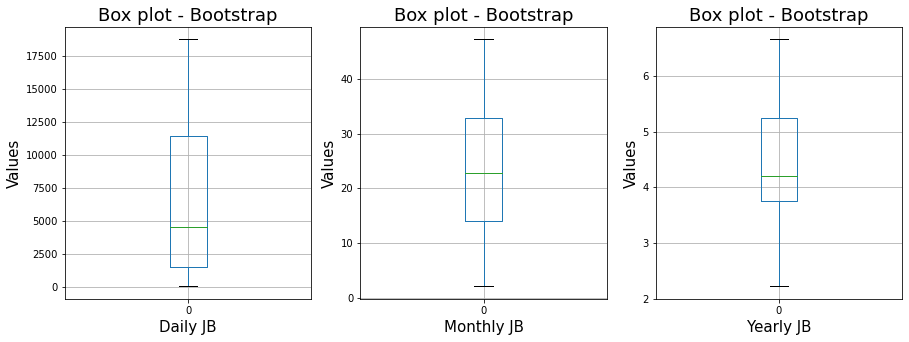

In [206]:
# Creating variables for each frequency of the JB - Boostrap
k = pd.DataFrame(daily_jb_stocks_lst)
i = pd.DataFrame(monthly_jb_bootstrap)
j = pd.DataFrame(yearly_jb_bootstrap)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plotting boxplots separately for each DataFrame's columns without outliers

# Box plot for daily data
k.boxplot(ax=axs[0], showfliers=False)
axs[0].set_title("Box plot - Bootstrap", fontsize=18)
axs[0].set_xlabel("Daily JB", fontsize=15)
axs[0].set_ylabel("Values", fontsize=15)

# Box plot for monthly data
i.boxplot(ax=axs[1], showfliers=False)
axs[1].set_title("Box plot - Bootstrap", fontsize=18)
axs[1].set_xlabel("Monthly JB", fontsize=15)
axs[1].set_ylabel("Values", fontsize=15)

# Box plot for annual data
j.boxplot(ax=axs[2], showfliers=False)
axs[2].set_title("Box plot - Bootstrap", fontsize=18)
axs[2].set_xlabel("Yearly JB", fontsize=15)
axs[2].set_ylabel("Values", fontsize=15)

plt.show()

**Explanation**: Although the values are different we can see the same pattern occurring. As we increase the time step (from daily to annual), we can see the JB statistics becoming smaller and getting closer to zero. This again, provides more evidence for the claim that stock returns exhibit aggregational Gaussianity

**Summary/Conclusion**: Yes, the results seem to support the claim about stocks exhibiting aggrerational Gaussianity. However, this does mean the data is normally distributed just that when we have "aggregated" data (increase the time-steps) it exhhibits more normal distribution properties.

**Important Note**: One final point is that a more efficient way to compute the JB statistics was to use the `scipy.stats.jarque_bera()` function. However, as I mentioned at the beginning, I assumed the question required us to use a combination of the different topics learned in lectures to show our knowledge of these topics rather than focusing on only efficiency.

<br>

## Exercise 3:

#### Initial data analysis, manipulation and visualisation:

In [207]:
# Importing the relevant modules/packages/files 
from pandas_datareader import data
import yfinance as yfin
import datetime

yfin.pdr_override()

# Choosing "OEX" as asked and also I choose the same dates as for Exercise 1

start = datetime.datetime(2016, 6, 6) # Choosing the start date
end = datetime.datetime(2023, 7, 14)  # Choosing the final date

oex_index = data.get_data_yahoo("^OEX",  start, end) # "Fetching" the data
oex_index

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-06,928.179993,933.960022,928.179993,931.900024,931.900024,3442020000
2016-06-07,932.070007,935.739990,932.070007,932.229980,932.229980,3534730000
2016-06-08,932.450012,935.890015,932.450012,935.270020,935.270020,3562060000
2016-06-09,933.849976,934.619995,930.059998,933.580017,933.580017,3290320000
2016-06-10,931.559998,931.559998,924.039978,926.750000,926.750000,3515010000
...,...,...,...,...,...,...
2023-07-07,2057.070068,2071.560059,2049.800049,2050.419922,2050.419922,3630480000
2023-07-10,2047.420044,2052.389893,2036.349976,2047.489990,2047.489990,3429600000
2023-07-11,2050.239990,2060.879883,2043.599976,2058.969971,2058.969971,3624220000


**Note**: Here, I was unsure which timeframe to choose for the index, so I chose the same dates as **Exercise 1**.

In [208]:
# Saving the file just in case somehting happens to the API 
oex_index.to_csv("oex_file.csv", index=True)
saved_oex = pd.read_csv("oex_file.csv")
saved_oex

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,928.179993,933.960022,928.179993,931.900024,931.900024,3442020000
1,2016-06-07,932.070007,935.739990,932.070007,932.229980,932.229980,3534730000
2,2016-06-08,932.450012,935.890015,932.450012,935.270020,935.270020,3562060000
3,2016-06-09,933.849976,934.619995,930.059998,933.580017,933.580017,3290320000
4,2016-06-10,931.559998,931.559998,924.039978,926.750000,926.750000,3515010000
...,...,...,...,...,...,...,...
1783,2023-07-07,2057.070068,2071.560059,2049.800049,2050.419922,2050.419922,3630480000
1784,2023-07-10,2047.420044,2052.389893,2036.349976,2047.489990,2047.489990,3429600000
1785,2023-07-11,2050.239990,2060.879883,2043.599976,2058.969971,2058.969971,3624220000
1786,2023-07-12,2074.080078,2086.239990,2072.120117,2078.169922,2078.169922,3920290000


If needed, I can provide the `saved_oex` csv file.

I am going to use the `oex_index` above for my computations.

<br>

### Daily data:

#### Data analysis and manipulation:

In [209]:
# Visualising data
oex_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-06,928.179993,933.960022,928.179993,931.900024,931.900024,3442020000
2016-06-07,932.070007,935.739990,932.070007,932.229980,932.229980,3534730000
2016-06-08,932.450012,935.890015,932.450012,935.270020,935.270020,3562060000
2016-06-09,933.849976,934.619995,930.059998,933.580017,933.580017,3290320000
2016-06-10,931.559998,931.559998,924.039978,926.750000,926.750000,3515010000
...,...,...,...,...,...,...
2023-07-07,2057.070068,2071.560059,2049.800049,2050.419922,2050.419922,3630480000
2023-07-10,2047.420044,2052.389893,2036.349976,2047.489990,2047.489990,3429600000
2023-07-11,2050.239990,2060.879883,2043.599976,2058.969971,2058.969971,3624220000


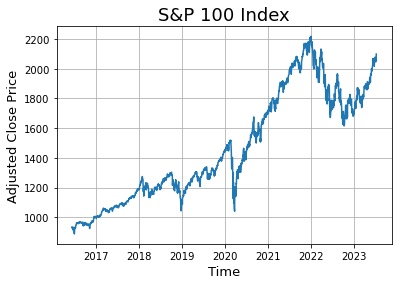

In [210]:
# Visualising the Adjusted close prices - Using function from earlier
oex_index_plot = figure_plotter(oex_index["Adj Close"], "Time", "Adjusted Close Price", "S&P 100 Index")

In [211]:
# Slicing daily prices
oex_daily_prices = oex_index["Adj Close"]
oex_daily_prices

Date
2016-06-06     931.900024
2016-06-07     932.229980
2016-06-08     935.270020
2016-06-09     933.580017
2016-06-10     926.750000
                 ...     
2023-07-07    2050.419922
2023-07-10    2047.489990
2023-07-11    2058.969971
2023-07-12    2078.169922
2023-07-13    2099.449951
Name: Adj Close, Length: 1788, dtype: float64

In [212]:
# Generating daily log returns
oex_daily_log = np.diff(np.log(oex_daily_prices))
oex_daily_log

array([ 0.00035401,  0.00325573, -0.0018086 , ...,  0.0055912 ,
        0.00928182,  0.01018772])

In [213]:
# Creating and visualising DataFrame using the function created at the beginning
oex_log_df = log_ret_dataframe_fixer(oex_daily_log, dates, "Daily_log_returns")
oex_log_df

,Daily_log_returns
Date,
2016-06-07,0.000354
2016-06-08,0.003256
2016-06-09,-0.001809
2016-06-10,-0.007343
2016-06-13,-0.007908
...,...
2023-07-07,-0.004681
2023-07-10,-0.001430
2023-07-11,0.005591


#### Daily log-returns:

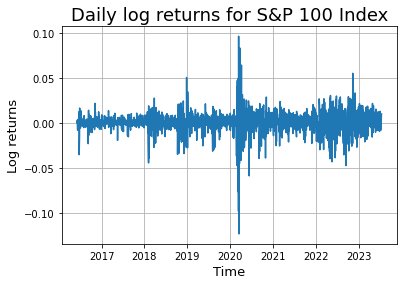

In [214]:
# Using function to plot graph with correct labelling and title
figure_plotter(oex_log_df, "Time", "Log returns", "Daily log returns for S&P 100 Index")

The graph shows data being centered around zero most of the time. Only towards 2020 and between 2022 and 2023 fluctuations become more "violent".

#### Histogram:

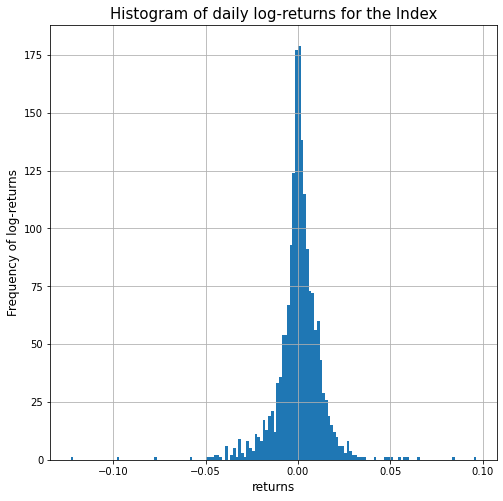

In [215]:
# Creating a histogram and labelling the axis and title
oex_log_df.hist(figsize=(8,8), bins=150)
plt.title(r"Histogram of daily log-returns for the Index", fontsize=15)
plt.xlabel(r"returns", fontsize=12)
plt.ylabel(r"Frequency of log-returns", fontsize=12)

# Showing the histogram
plt.show()

I would describe this  (_fairly_) normally distributed similar to the distribution in **Exercise 1 for daily log-returns**.  The shape resembles somewhat that of a bell curve but it is not really smooth. I believe if we were to include more data the histogram would look even **smother**, resembling the normal distribution curve even more. Only the tails look heavier than the ones in the standard normal distribution and it has a high peak.

#### QQ-plot:

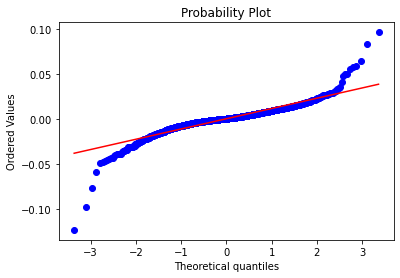

In [216]:
# Now using a qqplot
qq_plot = stats.probplot(oex_daily_log, dist="norm", plot=plt)
plt.show()

This is interesting, because just by looking at the distribution curve I stated that it looked normally distributed, but now I am less convinced. This is because the tails, especially the right side have more points away from the line. The values are deviating too much from the red line from my judgment, suggesting a departure from normality. On the other hand, the values in the middle are fairly close.

#### Tests and analysis:

In [217]:
# Generating JB for daily log
jb_daily_log_returns_index = jb_stats(oex_daily_log)
jb_daily_log_returns_index

9720.89476995549

In [218]:
# JB using Bootstrapping
p_value_daily_returns_index = jb_bootstrap_p_value(jb_daily_log_returns_index, oex_daily_log)

print(f"p-value for Jarque-Bera test using Bootstrap method:{p_value_daily_returns_index}")

p-value for Jarque-Bera test using Bootstrap method:0.4404


In [219]:
# JB from lecture notes
print(f"The result of the JB tests from lecture code is: ", jb_test(oex_daily_log))

The result of the JB tests from lecture code is:  (True, 15454.240345763692, 5.960720906254303)


**Explanation**: I have not included the `scipy.jarque_bera()` test and the Shapiro-Wilk test due to their own limitations with large sample sizes. Now, the p-value from the my bootstrap method says the p-value is 0.44 to two decimal places, which suggests no evidence for rejecting normality. The function used from lecture notes shows that the empirical JB is  much greater than the critical value. This means we reject the null hypothesis, thus evidence for rejecting normality. 

In summary, I would reject normality for this based on the tests and the QQ-plot, but the distribution plot looked "ok". I put more weight on the result from the lecture notes code than my own bootstrap method but they conclude the same thing at the end (when we look at the JB statistics, not the p-value to be clear).

<br>

### Monthly data:

#### Data analysis and manipulation:

The steps are similar, so I will do them all in one "block" of code.

In [220]:
# Creating the DataFrame
oex_monthly_prices = oex_index["Adj Close"].resample('M').last()

oex_monthly_log = np.diff(np.log(oex_monthly_prices))

# Crating data frame for monthly data
oex_log_monthly_df = log_ret_dataframe_fixer(oex_monthly_log, monthly_dates, "Monthly_log_returns")
oex_log_monthly_df

,Monthly_log_returns
Date,
2016-07-31,0.035583
2016-08-31,-0.001738
2016-09-30,-0.001459
2016-10-31,-0.015569
2016-11-30,0.026111
...,...
2023-03-31,0.053069
2023-04-30,0.020436
2023-05-31,0.022519


#### Monthly log-returns:

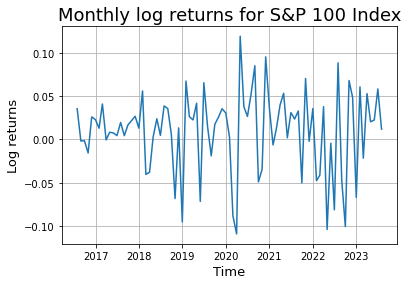

In [221]:
# Plotting monthly log-returns
figure_plotter(oex_log_monthly_df, "Time", "Log returns", "Monthly log returns for S&P 100 Index")

They look to deviate a lot and not really centered at zero.

#### Histogram:

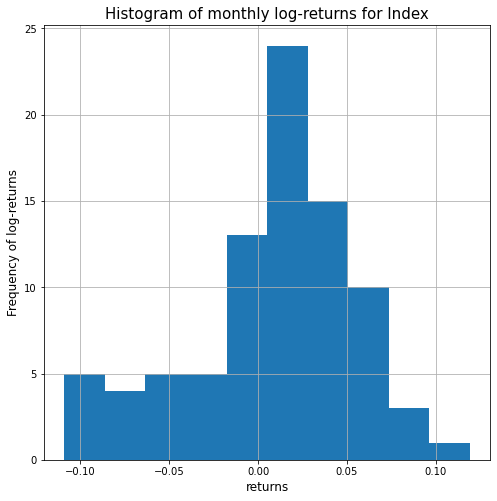

In [222]:
# Plotting histogram
oex_log_monthly_df.hist(figsize=(8,8), bins=10)
plt.title(r"Histogram of monthly log-returns for Index", fontsize=15)
plt.xlabel(r"returns", fontsize=12)
plt.ylabel(r"Frequency of log-returns", fontsize=12)

plt.show()

**Explanation**: This histogram does not suggest normality. There is more data on the left tail compared to the right tail which means we have skewness.

#### QQ-plot:

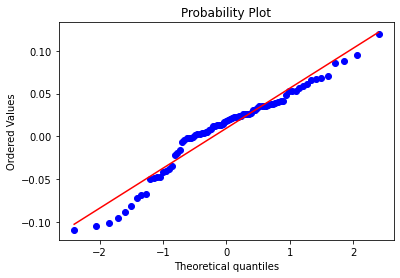

In [223]:
# Generating QQ plot
qq_plot = stats.probplot(oex_monthly_log, dist="norm", plot=plt)
plt.show()

#### Tests and analysis:

In [224]:
# Generating JB statistics for monthly data
jb_monthly_log_returns_index = jb_stats(oex_monthly_log)
jb_monthly_log_returns_index

31.423738318675237

In [225]:
# Using the two methods for JB testing
p_value_monthly_returns_index = jb_bootstrap_p_value(jb_monthly_log_returns_index, oex_monthly_log)

print(f"p-value for Jarque-Bera test using Bootstrap method:{p_value_monthly_returns_index}")
print(f"The result of the JB tests from lecture code is: ", jb_test(oex_monthly_log))

p-value for Jarque-Bera test using Bootstrap method:0.5641
The result of the JB tests from lecture code is:  (True, 5.876146011656145, 5.293410583127505)


In [226]:
# Shapiro Wilk test - because we have a good sample size, not too big or small
stats.shapiro(oex_monthly_log)

ShapiroResult(statistic=0.9512538313865662, pvalue=0.0028468670789152384)

**Explanation**: The histogram has a good amount of data being "clustered" on the left side and it does not seem to show normality in general, hard to say only from this. The QQ plot shows data to be fairly close to the line but, again, it is not enough to determine normality. However, the QQ plot does show the points getting closer to the line in general compared to the daily returns, where the points at the tail were much further from the line. This is something interesting about the data. The result from the lecture slides' code rejects normality due to the same reasons explained in earlier exercises. Finally, the Shapiro-Wilk test having a p-value less than 0.05 indicates strong evidence against the null. I used the Shapiro-Wilk test here because the sample size is reasonable for this test.

Hence, I would say that monthly data are not normally distributed. 

<br>

### Annual data:

#### Data analysis and manipulation:

In [227]:
# Creating the annual DataFrame
oex_annual_prices = oex_index["Adj Close"].resample('BY').last() # Once again, chose Business year end as it seems to be more sensible
oex_annual_log = np.diff(np.log(oex_annual_prices)) # Generating log returns here

# Crating data frame
oex_log_annual_df = log_ret_dataframe_fixer(oex_annual_log, yearly_dates, "Annual_log_returns")
oex_log_annual_df

,Annual_log_returns
Date,
2017-12-29,0.176787
2018-12-31,-0.060340
2019-12-31,0.258309
2020-12-31,0.176466
2021-12-31,0.243376
2022-12-30,-0.249983
2023-12-29,0.205667


#### Annual log-returns:

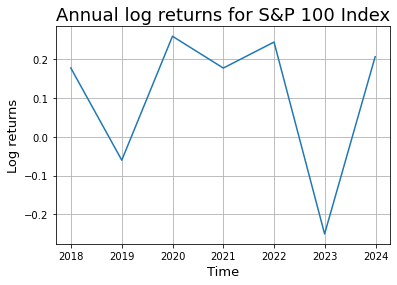

In [228]:
# Plotting yearly log-returns
figure_plotter(oex_log_annual_df, "Time", "Log returns", "Annual log returns for S&P 100 Index")

#### Histogram:

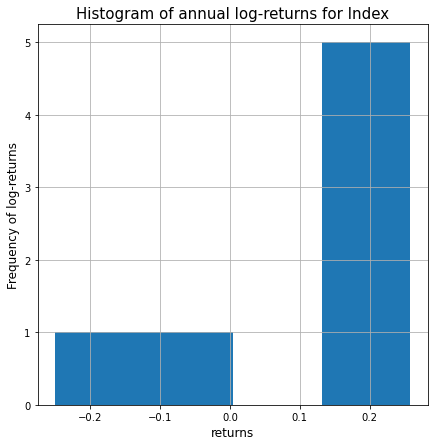

In [229]:
# Plotting histogram
oex_log_annual_df.hist(figsize=(7,7), bins="rice")
plt.title(r"Histogram of annual log-returns for Index", fontsize=15)
plt.xlabel(r"returns", fontsize=12)
plt.ylabel(r"Frequency of log-returns", fontsize=12)

# Plotting the function
plt.show()

Well, this does not tell much but it does not seem normally distributed only looking at this.

#### QQ-plot:

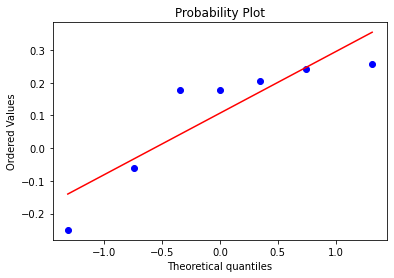

In [230]:
# Generating QQ plot
qq_plot = stats.probplot(oex_annual_log, dist="norm", plot=plt)
plt.show()

Again, very few point. Does not look normally distributed.

#### Tests and analysis:

In [231]:
# Generating JB statistics for annual data
jb_annual_log_returns_index = jb_stats(oex_annual_log)

# Using the two methods for JB testing
p_value_annual_returns_index = jb_bootstrap_p_value(jb_annual_log_returns_index, oex_annual_log)

print(f"p-value for Jarque-Bera test using Bootstrap method:{p_value_annual_returns_index}")
print(f"The result of the JB tests from lecture code is: ", jb_test(oex_annual_log))

p-value for Jarque-Bera test using Bootstrap method:0.712
The result of the JB tests from lecture code is:  (False, 1.4934332625097633, 1.831329054574681)


In [232]:
# Shapiro Wilk test - NOT RELIABLE BECAUSE OF SMALL SAMPLE SIZE, JUST TO SEE THE RESULT
stats.shapiro(oex_annual_log)

ShapiroResult(statistic=0.7878623008728027, pvalue=0.03100487031042576)

**Explanation**: The QQ-plot and the distribution graph show that the data is not normally distributed. However, the Jarque-Bera using the Bootstrap method has a p-value of 0.71 to two decimal places, suggesting no evidence against the null hypothesis. Also, the JB test from lecture notes shows that the empirical JB is less than the critical value, which implies we don't reject the null hypothesis. Finally, I also added the Shapiro-Wilk test again just to see the result, although with very few points the test tends to be a good method to test for normality. The Shapiro-Wilk tests, on the other hand, reject normality as the p-value is less than 0.05. 

Similarly to the Shapiro-Wilk test, there is some issue with bootstrapping with small sample sizes even if we have a large number of bootstrap replications. This is because even if we simulate the sample data multiple times, having very few points might not capture the full variability of the data, and this will impact accuracy. This is possibly why both the methods with bootstrapping provide conflicting answers to the other plots which highly suggest data not being sampled from a normal distribution.

In conclusion, I would say the data is not normally distributed just by looking at the plots. Even though, the tests say otherwise, I believe they are not a good representation because we have very few points which means the variability of the data is reduced when we "simulate" the data, making the tests ineffective. This is why in this case the plots give a better indication about the data being not normally distributed having very few points.

<br>

## Exercise 4:

Plan of action for the exercise:
- Get monthly prices for all stocks from the initial CSV file and then convert them into simple returns
- Get monthly prices from the S&P100 index from Exercise 3 and then convert them into simple returns
- Concatenate the data over "2016-06-06" and "2023-07-13" into a new data frame
- Use a loop to get the alphas and betas using statsmodels and then generate the boxplots
- Explain what I could have done differently to answer this question

#### Initial Data manipulation:

In [233]:
# Getting monthlty prices for stocks from Exercise 1
temp_df1 = prices.resample("M").last()
temp_df1

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-30,2016-06-30 00:00:00,23.900000,55.840000,83.269997,47.330002,73.019997,93.739998,39.310001,95.790001,52.889999,...,43.270000,14.152000,62.650002,141.199997,87.250000,107.720001,40.330002,74.169998,61.910000,113.290001
2016-07-31,2016-07-29 00:00:00,26.052500,55.410000,79.250000,47.970001,72.970001,88.949997,44.750000,97.860001,54.439999,...,46.340000,15.652667,69.750000,143.199997,93.050003,108.099998,42.169998,78.050003,66.230003,112.809998
2016-08-31,2016-08-31 00:00:00,26.525000,52.330002,80.709999,50.799999,71.440002,87.139999,42.020000,102.309998,59.830002,...,46.340000,14.134000,69.540001,136.050003,95.529999,109.220001,44.150002,80.900002,64.099998,115.000000
2016-09-30,2016-09-30 00:00:00,28.262501,51.980000,80.620003,44.279999,72.120003,87.279999,42.290001,108.540001,59.340000,...,46.720001,13.602000,70.180000,140.000000,97.529999,109.360001,42.889999,82.699997,63.070000,122.169998
2016-10-31,2016-10-31 00:00:00,28.385000,48.099998,82.730003,46.009998,70.019997,83.320000,39.240002,107.510002,61.700001,...,49.730000,13.182000,70.849998,141.330002,88.180000,107.760002,44.759998,82.510002,55.779999,116.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,2023-03-31 00:00:00,164.899994,38.889999,34.580002,37.380001,147.449997,109.660004,101.260002,385.369995,50.360001,...,144.839996,207.460007,186.009995,472.589996,201.259995,193.990005,36.049999,225.460007,159.369995,285.809998
2023-04-30,2023-04-28 00:00:00,169.679993,38.830002,35.250000,39.750000,150.970001,118.339996,110.470001,377.559998,53.040001,...,143.899994,164.309998,167.199997,492.089996,195.699997,179.809998,34.279999,232.729996,151.119995,280.290009
2023-05-31,2023-05-31 00:00:00,177.250000,35.630001,30.370001,39.810001,146.869995,102.180000,102.000000,417.790009,52.830002,...,137.250000,203.929993,173.880005,487.239990,192.520004,167.000000,29.900000,221.029999,137.960007,305.920013


In [234]:
# removing the date column "Date"
temp_df1 = temp_df1.iloc[:, 1:]
temp_df1

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-30,23.900000,55.840000,83.269997,47.330002,73.019997,93.739998,39.310001,95.790001,52.889999,152.149994,...,43.270000,14.152000,62.650002,141.199997,87.250000,107.720001,40.330002,74.169998,61.910000,113.290001
2016-07-31,26.052500,55.410000,79.250000,47.970001,72.970001,88.949997,44.750000,97.860001,54.439999,172.029999,...,46.340000,15.652667,69.750000,143.199997,93.050003,108.099998,42.169998,78.050003,66.230003,112.809998
2016-08-31,26.525000,52.330002,80.709999,50.799999,71.440002,87.139999,42.020000,102.309998,59.830002,170.059998,...,46.340000,14.134000,69.540001,136.050003,95.529999,109.220001,44.150002,80.900002,64.099998,115.000000
2016-09-30,28.262501,51.980000,80.620003,44.279999,72.120003,87.279999,42.290001,108.540001,59.340000,166.809998,...,46.720001,13.602000,70.180000,140.000000,97.529999,109.360001,42.889999,82.699997,63.070000,122.169998
2016-10-31,28.385000,48.099998,82.730003,46.009998,70.019997,83.320000,39.240002,107.510002,61.700001,141.160004,...,49.730000,13.182000,70.849998,141.330002,88.180000,107.760002,44.759998,82.510002,55.779999,116.239998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,164.899994,38.889999,34.580002,37.380001,147.449997,109.660004,101.260002,385.369995,50.360001,241.750000,...,144.839996,207.460007,186.009995,472.589996,201.259995,193.990005,36.049999,225.460007,159.369995,285.809998
2023-04-30,169.679993,38.830002,35.250000,39.750000,150.970001,118.339996,110.470001,377.559998,53.040001,239.740005,...,143.899994,164.309998,167.199997,492.089996,195.699997,179.809998,34.279999,232.729996,151.119995,280.290009
2023-05-31,177.250000,35.630001,30.370001,39.810001,146.869995,102.180000,102.000000,417.790009,52.830002,220.649994,...,137.250000,203.929993,173.880005,487.239990,192.520004,167.000000,29.900000,221.029999,137.960007,305.920013


In [235]:
# Transforming into log-returns
temp_df1_log = np.diff(np.log(temp_df1), axis=0) # Performing the operation on the rekevant axis
temp_df1_log 

array([[ 0.08623528, -0.00773038, -0.04948089, ...,  0.05098996,
         0.06745187, -0.00424594],
       [ 0.01797395, -0.05719022,  0.01825506, ...,  0.03586416,
        -0.03268924,  0.01922716],
       [ 0.06344819, -0.00671083, -0.00111568, ...,  0.02200572,
        -0.01619912,  0.06048137],
       ...,
       [ 0.0436469 , -0.08600518, -0.14901022, ..., -0.05158053,
        -0.09111035,  0.08749886],
       [ 0.09014235,  0.04285186, -0.06390217, ...,  0.07178496,
        -0.02369109,  0.00865741],
       [-0.01715934, -0.07218623,  0.04277168, ...,  0.02630583,
        -0.00849736,  0.02200328]])

In [236]:
# Reformatting into a DataFrame and checking monthly-log returns
temp_df1_log = log_ret_dataframe_fixer(temp_df1_log, monthly_dates, "AAPL") # Used Apple because this is how my first funtion work but aslo as a reference
temp_df1_log

,AAPL,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.086235,-0.007730,-0.049481,0.013431,-0.000685,-0.052451,0.129612,0.021380,0.028885,0.122802,...,0.068546,0.100785,0.107354,0.014065,0.064359,0.003521,0.044613,0.050990,0.067452,-0.004246
2016-08-31,0.017974,-0.057190,0.018255,0.057320,-0.021190,-0.020558,-0.062946,0.044470,0.094408,-0.011518,...,0.000000,-0.102058,-0.003015,-0.051220,0.026303,0.010307,0.045884,0.035864,-0.032689,0.019227
2016-09-30,0.063448,-0.006711,-0.001116,-0.137363,0.009473,0.001605,0.006405,0.059111,-0.008224,-0.019296,...,0.008167,-0.038366,0.009161,0.028620,0.020720,0.001281,-0.028954,0.022006,-0.016199,0.060481
2016-10-31,0.004325,-0.077577,0.025836,0.038326,-0.029551,-0.046433,-0.074854,-0.009535,0.039000,-0.166961,...,0.062436,-0.031365,0.009502,0.009455,-0.100780,-0.014739,0.042676,-0.002300,-0.122830,-0.049757
2016-11-30,-0.026959,0.036739,0.023887,0.139923,0.005838,0.046662,-0.030270,-0.044701,0.026075,0.020405,...,0.086257,-0.043041,0.042554,0.113521,0.139002,0.072994,0.103079,-0.064967,0.086174,0.027073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.112121,0.002059,-0.027102,-0.224106,0.036747,-0.002277,-0.004532,0.173615,-0.193478,0.042633,...,0.018536,0.008471,0.081509,-0.007064,-0.029473,0.061111,-0.280653,0.024788,0.034926,0.073524
2023-04-30,0.028575,-0.001544,0.019190,0.061474,0.023592,0.076177,0.087053,-0.020474,0.051849,-0.008349,...,-0.006511,-0.233184,-0.106610,0.040433,-0.028015,-0.075906,-0.050345,0.031736,-0.053154,-0.019502
2023-05-31,0.043647,-0.086005,-0.149010,0.001508,-0.027533,-0.146826,-0.079771,0.101249,-0.003967,-0.082977,...,-0.047314,0.216022,0.039175,-0.009905,-0.016383,-0.073907,-0.136704,-0.051581,-0.091110,0.087499


This is correct as the the monthly log-returns of the column with index 98, which corresponds to Visa is the same as in previous exercises. But, let's verify this as a safety measure below. If correct and no need to do any further data manipulation for this specific issue then I will fix the names columns at the end.

In [237]:
# Verifying if Visa  monthly log return of above data frame is the same as the one computed in exercise 1 
temp_df1_log[98] == monthly_log_ret_df["Visa_monthly_log_returns"] # 98 refers to the column related to Visa

Date
2016-07-31    True
2016-08-31    True
2016-09-30    True
2016-10-31    True
2016-11-30    True
              ... 
2023-03-31    True
2023-04-30    True
2023-05-31    True
2023-06-30    True
2023-07-31    True
Freq: M, Length: 85, dtype: bool

The result above shows we the analysis is in the right direction. Because the data frame just generated has its log-return column 98 (Visa) the same as the one tested in exercise 1 for Visa. The next step is to get simple returns from monthly returns.

In [238]:
# Getting simple returns (Monthly)
temp_df1_simple = np.exp(temp_df1_log) - 1
temp_df1_simple

,AAPL,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.090063,-0.007701,-0.048277,0.013522,-0.000685,-0.051099,0.138387,0.021610,0.029306,0.130661,...,0.070950,0.106039,0.113328,0.014164,0.066476,0.003528,0.045624,0.052312,0.069779,-0.004237
2016-08-31,0.018136,-0.055586,0.018423,0.058995,-0.020968,-0.020348,-0.061006,0.045473,0.099008,-0.011451,...,0.000000,-0.097023,-0.003011,-0.049930,0.026652,0.010361,0.046953,0.036515,-0.032161,0.019413
2016-09-30,0.065504,-0.006688,-0.001115,-0.128346,0.009518,0.001607,0.006426,0.060893,-0.008190,-0.019111,...,0.008200,-0.037640,0.009203,0.029033,0.020936,0.001282,-0.028539,0.022250,-0.016069,0.062348
2016-10-31,0.004334,-0.074644,0.026172,0.039070,-0.029118,-0.045371,-0.072121,-0.009490,0.039771,-0.153768,...,0.064426,-0.030878,0.009547,0.009500,-0.095868,-0.014631,0.043600,-0.002297,-0.115586,-0.048539
2016-11-30,-0.026599,0.037422,0.024175,0.150185,0.005856,0.047768,-0.029817,-0.043717,0.026418,0.020615,...,0.090086,-0.042128,0.043472,0.120215,0.149127,0.075724,0.108579,-0.062901,0.089996,0.027443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.118649,0.002061,-0.026738,-0.200770,0.037430,-0.002275,-0.004522,0.189597,-0.175912,0.043555,...,0.018709,0.008507,0.084923,-0.007039,-0.029043,0.063017,-0.244710,0.025098,0.035543,0.076295
2023-04-30,0.028987,-0.001543,0.019375,0.063403,0.023873,0.079154,0.090954,-0.020266,0.053217,-0.008314,...,-0.006490,-0.207992,-0.101124,0.041262,-0.027626,-0.073097,-0.049098,0.032245,-0.051766,-0.019313
2023-05-31,0.044613,-0.082411,-0.138440,0.001509,-0.027158,-0.136556,-0.076672,0.106553,-0.003959,-0.079628,...,-0.046213,0.241130,0.039952,-0.009856,-0.016249,-0.071242,-0.127771,-0.050273,-0.087083,0.091441


In [239]:
# Adjusting the ugly column name formatting
old_cols_adjusted = prices.columns[1:] # Choosing original column names excluding "Date" column
temp_df1_simple.columns = old_cols_adjusted # Overwriting column names
temp_df1_simple

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.090063,-0.007701,-0.048277,0.013522,-0.000685,-0.051099,0.138387,0.021610,0.029306,0.130661,...,0.070950,0.106039,0.113328,0.014164,0.066476,0.003528,0.045624,0.052312,0.069779,-0.004237
2016-08-31,0.018136,-0.055586,0.018423,0.058995,-0.020968,-0.020348,-0.061006,0.045473,0.099008,-0.011451,...,0.000000,-0.097023,-0.003011,-0.049930,0.026652,0.010361,0.046953,0.036515,-0.032161,0.019413
2016-09-30,0.065504,-0.006688,-0.001115,-0.128346,0.009518,0.001607,0.006426,0.060893,-0.008190,-0.019111,...,0.008200,-0.037640,0.009203,0.029033,0.020936,0.001282,-0.028539,0.022250,-0.016069,0.062348
2016-10-31,0.004334,-0.074644,0.026172,0.039070,-0.029118,-0.045371,-0.072121,-0.009490,0.039771,-0.153768,...,0.064426,-0.030878,0.009547,0.009500,-0.095868,-0.014631,0.043600,-0.002297,-0.115586,-0.048539
2016-11-30,-0.026599,0.037422,0.024175,0.150185,0.005856,0.047768,-0.029817,-0.043717,0.026418,0.020615,...,0.090086,-0.042128,0.043472,0.120215,0.149127,0.075724,0.108579,-0.062901,0.089996,0.027443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.118649,0.002061,-0.026738,-0.200770,0.037430,-0.002275,-0.004522,0.189597,-0.175912,0.043555,...,0.018709,0.008507,0.084923,-0.007039,-0.029043,0.063017,-0.244710,0.025098,0.035543,0.076295
2023-04-30,0.028987,-0.001543,0.019375,0.063403,0.023873,0.079154,0.090954,-0.020266,0.053217,-0.008314,...,-0.006490,-0.207992,-0.101124,0.041262,-0.027626,-0.073097,-0.049098,0.032245,-0.051766,-0.019313
2023-05-31,0.044613,-0.082411,-0.138440,0.001509,-0.027158,-0.136556,-0.076672,0.106553,-0.003959,-0.079628,...,-0.046213,0.241130,0.039952,-0.009856,-0.016249,-0.071242,-0.127771,-0.050273,-0.087083,0.091441


Above, we have monthly simple returns of all stocks. Now, the focus will be on the index, S&P100 separately.

In [240]:
# Monthly prices for the index
temp_df2 = oex_index["Adj Close"].resample('M').last()
temp_df2 = pd.DataFrame(temp_df2)
temp_df2

,Adj Close
Date,
2016-06-30,928.130005
2016-07-31,961.750000
2016-08-31,960.080017
2016-09-30,958.679993
2016-10-31,943.869995
...,...
2023-03-31,1874.420044
2023-04-30,1913.119995
2023-05-31,1956.689941


In [241]:
# Transforming into monthly log-returns
temp_df2_log = np.diff(np.log(temp_df2), axis=0) # Perform operation on the right axis

# Getting simple returns (Monthly)
temp_df2_simple = np.exp(temp_df2_log) - 1

# Reformatting into a DataFrame and checking monthly-log returns
temp_df2_simple = log_ret_dataframe_fixer(temp_df2_simple, monthly_dates, "Index")
temp_df2_simple

,Index
Date,
2016-07-31,0.036223
2016-08-31,-0.001736
2016-09-30,-0.001458
2016-10-31,-0.015448
2016-11-30,0.026455
...,...
2023-03-31,0.054502
2023-04-30,0.020646
2023-05-31,0.022774


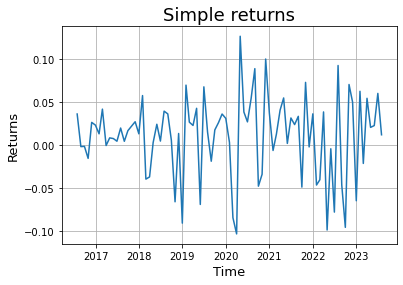

In [242]:
# Generating a plot using my function for simple monthly returns
figure_plotter(temp_df2_simple, "Time", "Returns", "Simple returns")

Above, we have monthly simple returns of the index. Next will be concatenating the data frames.

In [243]:
# Concatenating them together
final_combined_df = pd.concat([temp_df2_simple, temp_df1_simple], axis=1)
final_combined_df

,Index,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.036223,0.090063,-0.007701,-0.048277,0.013522,-0.000685,-0.051099,0.138387,0.021610,0.029306,...,0.070950,0.106039,0.113328,0.014164,0.066476,0.003528,0.045624,0.052312,0.069779,-0.004237
2016-08-31,-0.001736,0.018136,-0.055586,0.018423,0.058995,-0.020968,-0.020348,-0.061006,0.045473,0.099008,...,0.000000,-0.097023,-0.003011,-0.049930,0.026652,0.010361,0.046953,0.036515,-0.032161,0.019413
2016-09-30,-0.001458,0.065504,-0.006688,-0.001115,-0.128346,0.009518,0.001607,0.006426,0.060893,-0.008190,...,0.008200,-0.037640,0.009203,0.029033,0.020936,0.001282,-0.028539,0.022250,-0.016069,0.062348
2016-10-31,-0.015448,0.004334,-0.074644,0.026172,0.039070,-0.029118,-0.045371,-0.072121,-0.009490,0.039771,...,0.064426,-0.030878,0.009547,0.009500,-0.095868,-0.014631,0.043600,-0.002297,-0.115586,-0.048539
2016-11-30,0.026455,-0.026599,0.037422,0.024175,0.150185,0.005856,0.047768,-0.029817,-0.043717,0.026418,...,0.090086,-0.042128,0.043472,0.120215,0.149127,0.075724,0.108579,-0.062901,0.089996,0.027443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.054502,0.118649,0.002061,-0.026738,-0.200770,0.037430,-0.002275,-0.004522,0.189597,-0.175912,...,0.018709,0.008507,0.084923,-0.007039,-0.029043,0.063017,-0.244710,0.025098,0.035543,0.076295
2023-04-30,0.020646,0.028987,-0.001543,0.019375,0.063403,0.023873,0.079154,0.090954,-0.020266,0.053217,...,-0.006490,-0.207992,-0.101124,0.041262,-0.027626,-0.073097,-0.049098,0.032245,-0.051766,-0.019313
2023-05-31,0.022774,0.044613,-0.082411,-0.138440,0.001509,-0.027158,-0.136556,-0.076672,0.106553,-0.003959,...,-0.046213,0.241130,0.039952,-0.009856,-0.016249,-0.071242,-0.127771,-0.050273,-0.087083,0.091441


The next steps will be focused on using `statsmodels` to generate alphas and betas for all stocks. But first we need to get the monthly **excess returns**.

**Excess returns** are calculated as the following: $$r_{excess, t} = r_{i,t} - r_f$$

The formula above shows the **Excess return** of stock **i** at time **t**. Where $r_{i,t}$ represents the simple return of stock **i** at time **t** and $r_{f}$ is the risk-free rate.

**Note**: Below, I chose the risk-free rate of 1% as in the lectures to make the analysis short and concise, adapted to the coursework length. However, in reality, the "right" risk-free rate depends on the particular scenario. Because we are working with the S&P100 choosing a risk-free rate similar to a US government bond would be ideal I think. But for this case, we will stick to 1%.

In [244]:
# Generating excess returns (Monthly)
risk_free = 0.01 # Set the risk free rate at 1% as in lectures - but 4.3% might have been a more interesting choice - explanation at the end
excess_rets_df = final_combined_df - risk_free
excess_rets_df

,Index,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.026223,0.080063,-0.017701,-0.058277,0.003522,-0.010685,-0.061099,0.128387,0.011610,0.019306,...,0.060950,0.096039,0.103328,0.004164,0.056476,-0.006472,0.035624,0.042312,0.059779,-0.014237
2016-08-31,-0.011736,0.008136,-0.065586,0.008423,0.048995,-0.030968,-0.030348,-0.071006,0.035473,0.089008,...,-0.010000,-0.107023,-0.013011,-0.059930,0.016652,0.000361,0.036953,0.026515,-0.042161,0.009413
2016-09-30,-0.011458,0.055504,-0.016688,-0.011115,-0.138346,-0.000482,-0.008393,-0.003574,0.050893,-0.018190,...,-0.001800,-0.047640,-0.000797,0.019033,0.010936,-0.008718,-0.038539,0.012250,-0.026069,0.052348
2016-10-31,-0.025448,-0.005666,-0.084644,0.016172,0.029070,-0.039118,-0.055371,-0.082121,-0.019490,0.029771,...,0.054426,-0.040878,-0.000453,-0.000500,-0.105868,-0.024631,0.033600,-0.012297,-0.125586,-0.058539
2016-11-30,0.016455,-0.036599,0.027422,0.014175,0.140185,-0.004144,0.037768,-0.039817,-0.053717,0.016418,...,0.080086,-0.052128,0.033472,0.110215,0.139127,0.065724,0.098579,-0.072901,0.079996,0.017443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.044502,0.108649,-0.007939,-0.036738,-0.210770,0.027430,-0.012275,-0.014522,0.179597,-0.185912,...,0.008709,-0.001493,0.074923,-0.017039,-0.039043,0.053017,-0.254710,0.015098,0.025543,0.066295
2023-04-30,0.010646,0.018987,-0.011543,0.009375,0.053403,0.013873,0.069154,0.080954,-0.030266,0.043217,...,-0.016490,-0.217992,-0.111124,0.031262,-0.037626,-0.083097,-0.059098,0.022245,-0.061766,-0.029313
2023-05-31,0.012774,0.034613,-0.092411,-0.148440,-0.008491,-0.037158,-0.146556,-0.086672,0.096553,-0.013959,...,-0.056213,0.231130,0.029952,-0.019856,-0.026249,-0.081242,-0.137771,-0.060273,-0.097083,0.081441


In [245]:
# importing statsmodels package and testing it on Apple
import statsmodels.formula.api as sm
result = sm.ols(formula= "AAPL ~ Index", data=excess_rets_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           4.87e-16
Time:                        10:49:56   Log-Likelihood:                 124.75
No. Observations:                  85   AIC:                            -245.5
Df Residuals:                      83   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0172      0.006      2.804      0.006       0.005       0.029
Index          1.3230      0.131     10.066      0.000       1.062       1.584
==============================================================================
Omnibus:                       10.429   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               13.339
Skew:                          -0.572   Prob(JB):                      0.00127
Kurtosis:                       4.568   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
# Testing how the dynamics of the code works
result.params

Intercept    0.017165
Index        1.323047
dtype: float64

In [247]:
result.params["Index"]

1.3230468706933167

Above, I tested the OLS regression on Apple and the index and also checked the dynamics of the `.params` method which will be useful below. Next, I will use a loop to generate the alphas (intercepts) and betas (index) for each stock. More explanation will be given after the loop

In [248]:
# These 3 stocks have no value in the cvs, will remove them as they would not generate a regression
adjusted_columns_new = [name for name in old_cols_adjusted if not name in ["BRK.B", "DOW", "FB"]]

**Note**: At the end of the exercise I will include a section to explain how I could have done this differently.

In [249]:
# Using a loop to iterate through all the stock (with some exceptions) to generate the alphas and betas 
alpha_lst = [] # Appending all the alphas to this list
beta_lst = [] # Appending all the betas to this list

# Starting the loop
for stock in old_cols_adjusted:
    if stock not in ["BRK.B", "DOW", "FB"]: # I encountered an issue with these stocks - No values when look into csv data, so omitted them
        result = sm.ols(formula= f"{stock} ~ Index", data=excess_rets_df).fit() # performing the OLS
        alpha_lst.append(result.params[0]) # Getting the specific alpha 
        beta_lst.append(result.params[1]) # Getting the specific beta

**Explanation of the code above**: In summary, I used a for loop to iterate through each of the stocks except "BRK.B", "DOW" and "FB" (more on why not these will be explained later). The loop saves the regression on a variable called the result. Then, I used the `result.param[0]` and `result.param[1]` to "extract" the alphas and betas accordingly and appended them in their respective lists. 

The reason why I did not include "BRK.B", "DOW" and "FB" is because when trying the code it generated a couple of issues. After inspecting the cvs file I noticed these stocks have no data or partial data. So, if they have partial or no data, they would not generate regression data, so decided to omit them. An alternative way would have been to look for the data on the internet, concatenate them into the data frame, and then do as usual. Unfortunately, could not do this due to timing.

In [250]:
# Generating a DataFrame with the alphas and betas found
alpha_beta_df = pd.DataFrame((alpha_lst, beta_lst))
alpha_beta_df

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.017165,-0.014712,-0.019345,-0.007752,-0.000122,-0.005732,0.002909,0.012762,-0.004905,-0.003510,...,0.005312,0.040626,0.004096,0.005032,0.001923,-0.001038,-0.009054,0.005264,0.001679,0.003455
1,1.323047,0.389657,0.660424,1.089043,0.580196,0.982069,0.714958,1.329910,0.983729,0.697022,...,0.515669,2.175457,1.004156,0.673192,1.066598,1.095331,0.887073,0.934107,0.589702,1.200007


In [251]:
# Re-adjusting the column names
alpha_beta_df.columns = adjusted_columns_new

# Fixing index names
new_indices = ["Alpha", "Beta"]
alpha_beta_df.index = new_indices
alpha_beta_df

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Alpha,0.017165,-0.014712,-0.019345,-0.007752,-0.000122,-0.005732,0.002909,0.012762,-0.004905,-0.003510,...,0.005312,0.040626,0.004096,0.005032,0.001923,-0.001038,-0.009054,0.005264,0.001679,0.003455
Beta,1.323047,0.389657,0.660424,1.089043,0.580196,0.982069,0.714958,1.329910,0.983729,0.697022,...,0.515669,2.175457,1.004156,0.673192,1.066598,1.095331,0.887073,0.934107,0.589702,1.200007


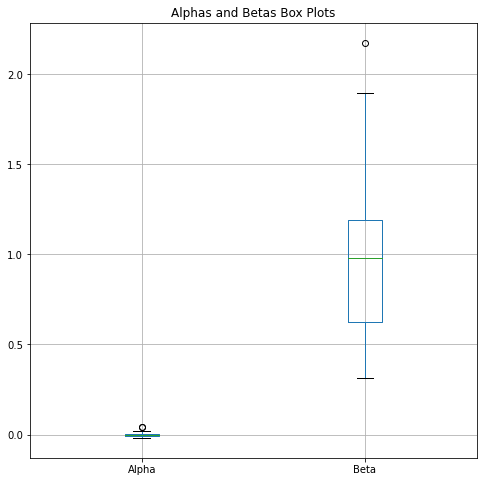

In [252]:
# Plotting the Box plots of alphas and Betas on the same graph
plt.figure(figsize=(8, 8))
plt.title("Alphas and Betas Box Plots")
alpha_beta_df.T.boxplot(showfliers=True) # Using a transpose instead of creating a new DataFrame - Similar technique used in Coursework 1
plt.show()

**Explanation**: The box plot of the alphas is difficult to understand because of the difference in the range of values, there will be a nice lot of alphas below. On the other hand, the betas' boxplot shows the following:
- The lower quartile is just above 0.5
- The median/middle quartile is just below 1
- The upper quartile is between 1 and 1.25
- There is only one outlier above 2
- The difference between Q2 and Q1 is larger than Q3 and Q2, suggesting skewness, slight negative skewness

Ultimately, we can observe that the betas, which are essentially the slopes of each regression line, are all positive. This means general upward trends for all stocks. I believe when stocks have betas less than 2, they are referred to as defensive stocks in the field of finance. Defensive in the sense they are less affected by market risk/movements. I don't want to go too out of the purpose of the exercise and coursework but I can provide references if needed (undergraduate notes/slides).

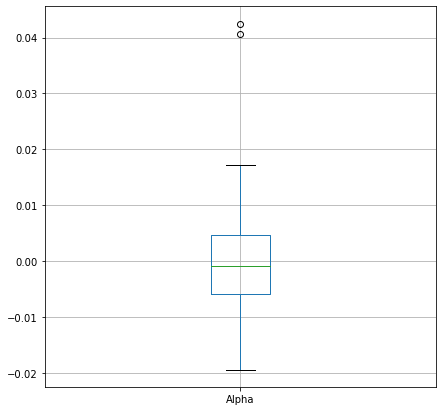

In [253]:
# Let's see the alphas on their own
alpha_alone = pd.DataFrame(alpha_beta_df.iloc[0, :])

#plt.title("Alphas") # Title makes the plot look strange so commented it out
plt.figure(figsize=(7, 7))
alpha_alone.boxplot(showfliers=True) # Using a trasnpose instead of creating a new DataFrame
plt.show()

**Explanation**: For alphas, the boxplot suggests the following:
 - Q1 is around - 0.005
 - Q2/median is around 0, just below it
 - Q3 is around + 0.005
 - There are two outliers above 0.04

In general, there is much less visible skewness with alphas than betas.

Another interesting point I found is that if we were to change the risk-free rate, then the alpha values will change but the betas will remain the same. I tried with `rr=0.043` and it showed what I have just mentioned. I specifically tested this amount as it's close to the 7-year Treasury rate for US bonds. 7 Years because similar to our data timeframe and US because we are talking about S&100, US stocks.

**Improvement point**: Another way I could have done this exercise instead of dropping those columns, which either had partial data or no data, is to retrieve the data from other sources online. Make sure that it is reliable by comparing one of the stocks we have (maybe Visa from `Yahoo Finance`) with that particular source (again Visa with `stooq` for instance). If prices match then it should be good to continue to do the analysis as usual by concatenating the data into the original data frame.

<br>

## Exercise 5:

**Note**: For this exercise, I will use a "step-by-step" approach with explanations rather than just giving my solution to the problem. Also, I will explain how I initially thought the exercise should be answered but after doing some research and looking at my notes from my undergraduate studies diverted my approach to the (hopefully) right way to do it.

First, let's get the excess returns we created from the previous exercise and then use them to compute the covariance matrix using the monthly excess returns.

In [254]:
# Monthly excess returns
excess_rets_df

,Index,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.026223,0.080063,-0.017701,-0.058277,0.003522,-0.010685,-0.061099,0.128387,0.011610,0.019306,...,0.060950,0.096039,0.103328,0.004164,0.056476,-0.006472,0.035624,0.042312,0.059779,-0.014237
2016-08-31,-0.011736,0.008136,-0.065586,0.008423,0.048995,-0.030968,-0.030348,-0.071006,0.035473,0.089008,...,-0.010000,-0.107023,-0.013011,-0.059930,0.016652,0.000361,0.036953,0.026515,-0.042161,0.009413
2016-09-30,-0.011458,0.055504,-0.016688,-0.011115,-0.138346,-0.000482,-0.008393,-0.003574,0.050893,-0.018190,...,-0.001800,-0.047640,-0.000797,0.019033,0.010936,-0.008718,-0.038539,0.012250,-0.026069,0.052348
2016-10-31,-0.025448,-0.005666,-0.084644,0.016172,0.029070,-0.039118,-0.055371,-0.082121,-0.019490,0.029771,...,0.054426,-0.040878,-0.000453,-0.000500,-0.105868,-0.024631,0.033600,-0.012297,-0.125586,-0.058539
2016-11-30,0.016455,-0.036599,0.027422,0.014175,0.140185,-0.004144,0.037768,-0.039817,-0.053717,0.016418,...,0.080086,-0.052128,0.033472,0.110215,0.139127,0.065724,0.098579,-0.072901,0.079996,0.017443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.044502,0.108649,-0.007939,-0.036738,-0.210770,0.027430,-0.012275,-0.014522,0.179597,-0.185912,...,0.008709,-0.001493,0.074923,-0.017039,-0.039043,0.053017,-0.254710,0.015098,0.025543,0.066295
2023-04-30,0.010646,0.018987,-0.011543,0.009375,0.053403,0.013873,0.069154,0.080954,-0.030266,0.043217,...,-0.016490,-0.217992,-0.111124,0.031262,-0.037626,-0.083097,-0.059098,0.022245,-0.061766,-0.029313
2023-05-31,0.012774,0.034613,-0.092411,-0.148440,-0.008491,-0.037158,-0.146556,-0.086672,0.096553,-0.013959,...,-0.056213,0.231130,0.029952,-0.019856,-0.026249,-0.081242,-0.137771,-0.060273,-0.097083,0.081441


In [255]:
# Covarinace matrix of the components of the index using the monthly excess-returns
covariance_mat = excess_rets_df.cov()
covariance_mat

,Index,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Index,0.002194,0.002903,0.000855,0.001449,0.002390,0.001273,0.002155,0.001569,0.002918,0.002159,...,0.001132,0.004774,0.002203,0.001477,0.002341,0.002404,0.001947,0.002050,0.001294,0.002633
AAPL,0.002903,0.006988,0.000540,0.001081,0.001730,0.001717,0.001727,0.001800,0.004632,0.000925,...,0.001508,0.009175,0.002686,0.001476,0.002288,0.002638,0.001286,0.002812,0.000566,0.003483
VZ,0.000855,0.000540,0.002384,0.001165,0.001311,0.000831,0.001429,0.001046,0.000643,0.000630,...,0.000710,0.000850,0.000690,0.000746,0.000868,0.001663,0.001292,0.001111,0.000872,0.001006
WBA,0.001449,0.001081,0.001165,0.006512,0.002761,0.001366,0.002657,0.001774,0.000769,0.001754,...,0.001125,0.000398,0.001115,0.001691,0.001559,0.002426,0.002274,0.001004,0.001315,0.001755
WFC,0.002390,0.001730,0.001311,0.002761,0.008072,0.000968,0.005252,0.000808,0.001823,0.004982,...,0.001360,0.004086,0.002348,0.001826,0.002886,0.002808,0.005519,0.002668,0.002011,0.002405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,0.002404,0.002638,0.001663,0.002426,0.002808,0.001922,0.001928,0.001882,0.002813,0.002310,...,0.001486,0.004288,0.002273,0.002102,0.003340,0.006808,0.002665,0.001911,0.001789,0.002848
USB,0.001947,0.001286,0.001292,0.002274,0.005519,0.000592,0.003740,0.001011,0.001730,0.004960,...,0.001384,0.002062,0.002325,0.001429,0.002550,0.002665,0.005991,0.002238,0.001286,0.001992
V,0.002050,0.002812,0.001111,0.001004,0.002668,0.001202,0.002796,0.001488,0.003037,0.002570,...,0.001743,0.003407,0.001964,0.001310,0.001934,0.001911,0.002238,0.003790,0.001529,0.002614
ABBV,0.001294,0.000566,0.000872,0.001315,0.002011,0.000410,0.001827,0.001191,0.000860,0.002504,...,0.001002,0.001444,0.001438,0.001951,0.002228,0.001789,0.001286,0.001529,0.006215,0.001887


**Some testings**: Above we have the covariance matrix of the components of the index using the monthly excess returns. However, before proceeding to the next steps, I wanted to verify if it is correct or if there might be some issues with this.

When computing the covariance of a variable, we are essentially finding its variance. For example, the covariance of the index with itself is essentially the variance of the index. Or the covariance of the Apple with itself is essentially the variance of Apple. This means the diagonal values of the covariance matrix should be the variance of the stock/index themselves. This is because of the definition of covariance.

The following shows the covariance in matrix form for n variables:

$$
\begin{bmatrix}
\text{Var}(x_1) & \text{Cov}(x_1, x_2) & \cdots & \text{Cov}(x_1, x_n) \\
\text{Cov}(x_2, x_1) & \text{Var}(x_2) & \cdots & \text{Cov}(x_2, x_n) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(x_n, x_1) & \text{Cov}(x_n, x_2) & \cdots & \text{Var}(x_n) \\
\end{bmatrix}
$$


In [256]:
# Testing the index
test_1 = excess_rets_df["Index"]
print(f" The variance of the index is: {round(np.var(test_1), 4)}")

 The variance of the index is: 0.0022


In [257]:
# Testing Apple
test2 = excess_rets_df["AAPL"]
print(f" The variance of the index is: {round(np.var(test2), 4)}")

 The variance of the index is: 0.0069


Well, the tests look good, what I expected. It aligns with the diagonal values in the covariance matrix.

### Testing the hypothesis:

The hypothesis we need to tests is: "According to the single-index model (see Elton and Gruber 1997; reference below), the covariance of a given pair of stocks should be directly proportional to the product of the corresponding β values."

Let's now get the data we require for the exercise.

**1. Covariance matrix of stocks:** 

In [258]:
# Getting rid of some columns (no or partial data)
excess_rets_df_new = excess_rets_df.drop(["BRK.B", "DOW", "FB", "Index"], axis=1)
excess_rets_df_new

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-31,0.080063,-0.017701,-0.058277,0.003522,-0.010685,-0.061099,0.128387,0.011610,0.019306,0.120661,...,0.060950,0.096039,0.103328,0.004164,0.056476,-0.006472,0.035624,0.042312,0.059779,-0.014237
2016-08-31,0.008136,-0.065586,0.008423,0.048995,-0.030968,-0.030348,-0.071006,0.035473,0.089008,-0.021451,...,-0.010000,-0.107023,-0.013011,-0.059930,0.016652,0.000361,0.036953,0.026515,-0.042161,0.009413
2016-09-30,0.055504,-0.016688,-0.011115,-0.138346,-0.000482,-0.008393,-0.003574,0.050893,-0.018190,-0.029111,...,-0.001800,-0.047640,-0.000797,0.019033,0.010936,-0.008718,-0.038539,0.012250,-0.026069,0.052348
2016-10-31,-0.005666,-0.084644,0.016172,0.029070,-0.039118,-0.055371,-0.082121,-0.019490,0.029771,-0.163768,...,0.054426,-0.040878,-0.000453,-0.000500,-0.105868,-0.024631,0.033600,-0.012297,-0.125586,-0.058539
2016-11-30,-0.036599,0.027422,0.014175,0.140185,-0.004144,0.037768,-0.039817,-0.053717,0.016418,0.010615,...,0.080086,-0.052128,0.033472,0.110215,0.139127,0.065724,0.098579,-0.072901,0.079996,0.017443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.108649,-0.007939,-0.036738,-0.210770,0.027430,-0.012275,-0.014522,0.179597,-0.185912,0.033555,...,0.008709,-0.001493,0.074923,-0.017039,-0.039043,0.053017,-0.254710,0.015098,0.025543,0.066295
2023-04-30,0.018987,-0.011543,0.009375,0.053403,0.013873,0.069154,0.080954,-0.030266,0.043217,-0.018314,...,-0.016490,-0.217992,-0.111124,0.031262,-0.037626,-0.083097,-0.059098,0.022245,-0.061766,-0.029313
2023-05-31,0.034613,-0.092411,-0.148440,-0.008491,-0.037158,-0.146556,-0.086672,0.096553,-0.013959,-0.089628,...,-0.056213,0.231130,0.029952,-0.019856,-0.026249,-0.081242,-0.137771,-0.060273,-0.097083,0.081441


In [259]:
# Covariance of matrix of the stocks adjusted
covariance_mat_adj_stocks = excess_rets_df_new.cov()
covariance_mat_adj_stocks

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
AAPL,0.006988,0.000540,0.001081,0.001730,0.001717,0.001727,0.001800,0.004632,0.000925,0.001729,...,0.001508,0.009175,0.002686,0.001476,0.002288,0.002638,0.001286,0.002812,0.000566,0.003483
VZ,0.000540,0.002384,0.001165,0.001311,0.000831,0.001429,0.001046,0.000643,0.000630,0.001237,...,0.000710,0.000850,0.000690,0.000746,0.000868,0.001663,0.001292,0.001111,0.000872,0.001006
WBA,0.001081,0.001165,0.006512,0.002761,0.001366,0.002657,0.001774,0.000769,0.001754,0.002547,...,0.001125,0.000398,0.001115,0.001691,0.001559,0.002426,0.002274,0.001004,0.001315,0.001755
WFC,0.001730,0.001311,0.002761,0.008072,0.000968,0.005252,0.000808,0.001823,0.004982,0.001565,...,0.001360,0.004086,0.002348,0.001826,0.002886,0.002808,0.005519,0.002668,0.002011,0.002405
WMT,0.001717,0.000831,0.001366,0.000968,0.002897,0.000873,0.001047,0.001346,0.000936,0.000861,...,0.000832,0.002694,0.001085,0.001328,0.001323,0.001922,0.000592,0.001202,0.000410,0.001629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,0.002638,0.001663,0.002426,0.002808,0.001922,0.001928,0.001882,0.002813,0.002310,0.001971,...,0.001486,0.004288,0.002273,0.002102,0.003340,0.006808,0.002665,0.001911,0.001789,0.002848
USB,0.001286,0.001292,0.002274,0.005519,0.000592,0.003740,0.001011,0.001730,0.004960,0.001137,...,0.001384,0.002062,0.002325,0.001429,0.002550,0.002665,0.005991,0.002238,0.001286,0.001992
V,0.002812,0.001111,0.001004,0.002668,0.001202,0.002796,0.001488,0.003037,0.002570,0.001890,...,0.001743,0.003407,0.001964,0.001310,0.001934,0.001911,0.002238,0.003790,0.001529,0.002614
ABBV,0.000566,0.000872,0.001315,0.002011,0.000410,0.001827,0.001191,0.000860,0.002504,0.002128,...,0.001002,0.001444,0.001438,0.001951,0.002228,0.001789,0.001286,0.001529,0.006215,0.001887


**2. Betas of stocks:** 

In [260]:
# Getting the beta values from Exercise 4 and putting it in a separate data frame called betas_alone
betas_alone = pd.DataFrame((alpha_beta_df.iloc[1:,:]))
betas_alone

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Beta,1.323047,0.389657,0.660424,1.089043,0.580196,0.982069,0.714958,1.32991,0.983729,0.697022,...,0.515669,2.175457,1.004156,0.673192,1.066598,1.095331,0.887073,0.934107,0.589702,1.200007


In [261]:
# This is an extra step but helps me understand the following (what I am trying to do):
# Creating two identical rows to compute the matrix table of the stock betas in the following step
# The rows are the same as the bariable betas_alone as should represent two vectors
row1 = row2 = alpha_beta_df.iloc[1:,:]
row1

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Beta,1.323047,0.389657,0.660424,1.089043,0.580196,0.982069,0.714958,1.32991,0.983729,0.697022,...,0.515669,2.175457,1.004156,0.673192,1.066598,1.095331,0.887073,0.934107,0.589702,1.200007


In [262]:
# Betas times betas matrix:
multi_matrix_betas = np.outer(row1, row2) # Using np.outer function to compute the outer products of two vectors 
multi_matrix_betas = pd.DataFrame(multi_matrix_betas) # converting into a data frame 
multi_matrix_betas

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1.750453,0.515534,0.873772,1.440855,0.767626,1.299324,0.945923,1.759533,1.301520,0.922193,...,0.682254,2.878232,1.328546,0.890664,1.411159,1.449174,1.173640,1.235868,0.780203,1.587665
1,0.515534,0.151832,0.257339,0.424353,0.226077,0.382670,0.278588,0.518208,0.383317,0.271599,...,0.200934,0.847682,0.391276,0.262314,0.415607,0.426803,0.345654,0.363981,0.229781,0.467591
2,0.873772,0.257339,0.436160,0.719230,0.383175,0.648582,0.472175,0.878304,0.649678,0.460330,...,0.340560,1.436724,0.663169,0.444592,0.704407,0.723382,0.585845,0.616907,0.389453,0.792513
3,1.440855,0.424353,0.719230,1.186014,0.631858,1.069516,0.778620,1.448329,1.071324,0.759087,...,0.561585,2.369166,1.093569,0.733135,1.161571,1.192862,0.966061,1.017283,0.642211,1.306859
4,0.767626,0.226077,0.383175,0.631858,0.336627,0.569792,0.414815,0.771608,0.570755,0.404409,...,0.299189,1.262190,0.582607,0.390583,0.618835,0.635506,0.514676,0.541965,0.342142,0.696239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1.449174,0.426803,0.723382,1.192862,0.635506,1.075690,0.783115,1.456691,1.077509,0.763470,...,0.564827,2.382844,1.099883,0.737368,1.168277,1.199749,0.971639,1.023156,0.645918,1.314404
94,1.173640,0.345654,0.585845,0.966061,0.514676,0.871168,0.634220,1.179728,0.872640,0.618310,...,0.457436,1.929790,0.890761,0.597171,0.946151,0.971639,0.786899,0.828622,0.523109,1.064494
95,1.235868,0.363981,0.616907,1.017283,0.541965,0.917358,0.667847,1.242279,0.918909,0.651093,...,0.481690,2.032110,0.937990,0.628833,0.996317,1.023156,0.828622,0.872556,0.550845,1.120935
96,0.780203,0.229781,0.389453,0.642211,0.342142,0.579128,0.421612,0.784250,0.580107,0.411035,...,0.304091,1.282871,0.592153,0.396982,0.628975,0.645918,0.523109,0.550845,0.347748,0.707646


Although it is not explicit, the columns and the index are the same as the **covariance_mat_adj_stocks** variable before. They represent the multiplication of the betas of the stocks. 

**Note**: I have two approaches to this question and I believe the second one is what we are looking for but I will also discuss its possible issues. I attempted the second part after reviewing some of my old notes from undergraduate (reference will be provided).

#### Initial approach:

My initial approach was to follow the instrucions to the letter. So find, the covariance matrix of stocks, find the product of the corresponding β values. Then, use a scatter plot (and regression) to assess linearity.

The reason why I look for linearity is because if we are looking for proportionality, specifically direct proportionality, then if one variable increases then the other variable should also increase at a specific rate. We can illustrate linearity with the following:

**Direct Proportionality**: The variable **Y** is directly proportional to **X** and **k** is the constant of proportionality.

$$ \text Y = \text k \times \text X $$

The idea is to plot the two variables in a scatter plot and also add a regression.

In [263]:
# Flattening the data
xdata = np.array(covariance_mat_adj_stocks).flatten()
ydata = np.array(multi_matrix_betas).flatten()

# Generating a regression
regression_result = (beta, alpha, rvalue, pvalue, stderr) = stats.linregress(x=xdata, y=ydata)
regression_result

LinregressResult(slope=241.49043343047026, intercept=0.3660128254035524, rvalue=0.7375126751237369, pvalue=0.0, stderr=2.256668416196224, intercept_stderr=0.00584007737558889)

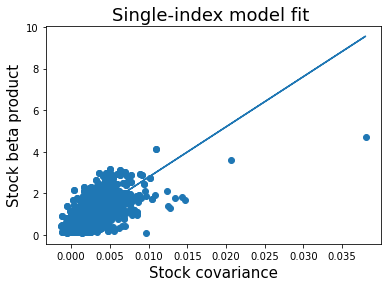

In [264]:
# Plotting the data and the regression line
plt.scatter(x=xdata, y=ydata)
plt.plot(xdata, regression_result[1] + regression_result[0] * xdata)

# Adding the labels and titles
plt.xlabel('Stock covariance', fontsize=15)
plt.ylabel('Stock beta product', fontsize=15)
plt.title('Single-index model fit ', fontsize=18)
plt.show()

**Result/Explanation**: This shows little or no sign of direct proportionality. Most of the data points are clustered in a specific area. This would suggest that the hypothesis is wrong. However, after revisiting my notes from undergraduate studies from Capital Markets 1 and doing some research I found some issues with my initial approach.

#### Second approach:

I was unsure of the result of the previous findings so I decided to do some research about the single-index model and I re-learned the following:

For the **Single-Index model** the covariance between a pair of stocks **i** and **j** with returns $r_i$ and the market $r_j$ is given by:

$$ \text{Cov}(r_i, r_j) = \beta_i \times \beta_j\times \sigma^2(r_m) $$


Where $r_m$ represents the return of the market index and $\sigma^2(r_m)$ is its variance. Also, $\beta_i$ and $\beta_j$ represent the betas for stock **i** and **j** respectively.

Based on this, my initial covariance matrix of stock returns was calculated in the wrong manner.

Below, I have included the slide of the Capital Markets 1 module from the second year university course. For reference please look below and if you cannot see an image please feel free to contact me.

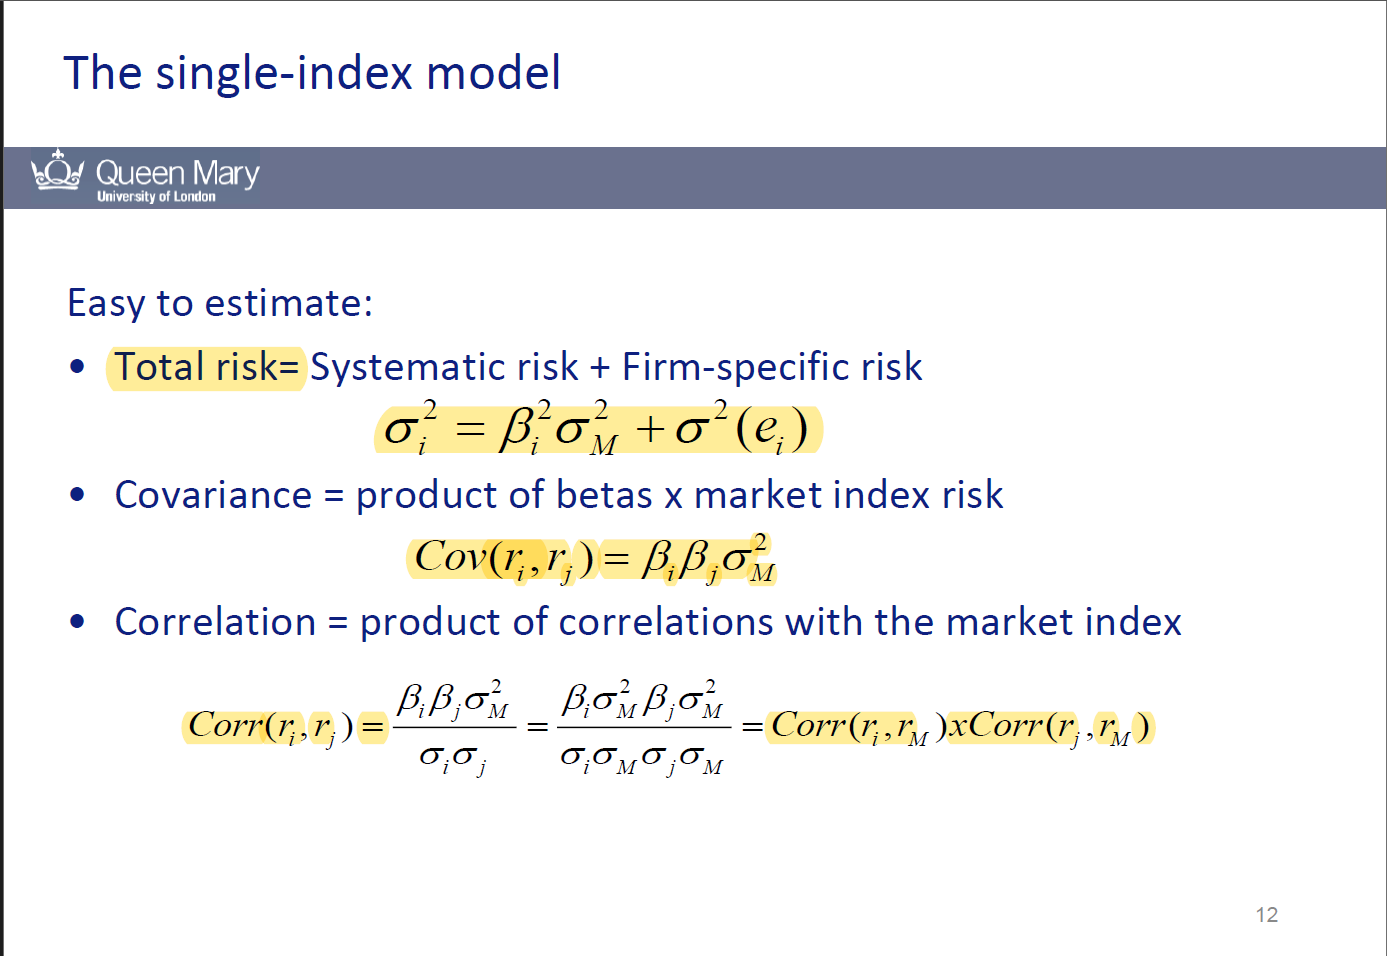

**Reference for above**: Luigi Ventimiglia (2019). The single-index model. Lecture 7: Index Models (CAPM in Practice). Capital Markets-1, slide 12.

In [265]:
# Getting the variance of the index return
index_variance = np.var(excess_rets_df["Index"])
index_variance

0.002168551412374775

In [266]:
# Generating the single-index model covariance matrix of stocks by muriplying the beta*beta matrix by the variance of the index return
single_index_stock_cov = multi_matrix_betas * index_variance # Performing a scalar multiplication
single_index_stock_cov

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.003796,0.001118,0.001895,0.003125,0.001665,0.002818,0.002051,0.003816,0.002822,0.002000,...,0.001480,0.006242,0.002881,0.001931,0.003060,0.003143,0.002545,0.002680,0.001692,0.003443
1,0.001118,0.000329,0.000558,0.000920,0.000490,0.000830,0.000604,0.001124,0.000831,0.000589,...,0.000436,0.001838,0.000849,0.000569,0.000901,0.000926,0.000750,0.000789,0.000498,0.001014
2,0.001895,0.000558,0.000946,0.001560,0.000831,0.001406,0.001024,0.001905,0.001409,0.000998,...,0.000739,0.003116,0.001438,0.000964,0.001528,0.001569,0.001270,0.001338,0.000845,0.001719
3,0.003125,0.000920,0.001560,0.002572,0.001370,0.002319,0.001688,0.003141,0.002323,0.001646,...,0.001218,0.005138,0.002371,0.001590,0.002519,0.002587,0.002095,0.002206,0.001393,0.002834
4,0.001665,0.000490,0.000831,0.001370,0.000730,0.001236,0.000900,0.001673,0.001238,0.000877,...,0.000649,0.002737,0.001263,0.000847,0.001342,0.001378,0.001116,0.001175,0.000742,0.001510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.003143,0.000926,0.001569,0.002587,0.001378,0.002333,0.001698,0.003159,0.002337,0.001656,...,0.001225,0.005167,0.002385,0.001599,0.002533,0.002602,0.002107,0.002219,0.001401,0.002850
94,0.002545,0.000750,0.001270,0.002095,0.001116,0.001889,0.001375,0.002558,0.001892,0.001341,...,0.000992,0.004185,0.001932,0.001295,0.002052,0.002107,0.001706,0.001797,0.001134,0.002308
95,0.002680,0.000789,0.001338,0.002206,0.001175,0.001989,0.001448,0.002694,0.001993,0.001412,...,0.001045,0.004407,0.002034,0.001364,0.002161,0.002219,0.001797,0.001892,0.001195,0.002431
96,0.001692,0.000498,0.000845,0.001393,0.000742,0.001256,0.000914,0.001701,0.001258,0.000891,...,0.000659,0.002782,0.001284,0.000861,0.001364,0.001401,0.001134,0.001195,0.000754,0.001535


Now, let plot a regression below by performing the same steps done in the **initial approach**:

In [267]:
# Flattening the data
xdata = np.array(single_index_stock_cov).flatten()
ydata = np.array(multi_matrix_betas).flatten()

# Generating a regression
regression_result = (beta, alpha, rvalue, pvalue, stderr) = stats.linregress(x=xdata, y=ydata)
regression_result

LinregressResult(slope=461.137326186287, intercept=1.1102230246251565e-16, rvalue=0.9999999999999998, pvalue=0.0, stderr=9.91709644495113e-08, intercept_stderr=2.1578177203125377e-10)

In [268]:
regression_result.rvalue

0.9999999999999998

As we can see, the **rvalue** is almost 1 suggesting almost a perfect liner model.

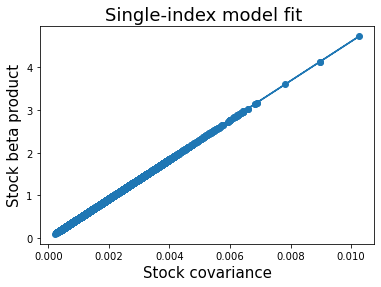

In [269]:
# Plotting
plt.scatter(single_index_stock_cov, multi_matrix_betas)
plt.plot(xdata, regression_result[1] + regression_result[0] * xdata)

# Adding the labels and titles
plt.xlabel('Stock covariance', fontsize=15)
plt.ylabel('Stock beta product', fontsize=15)
plt.title('Single-index model fit ', fontsize=18)
plt.show()

**Result/Explanation**: The result of the plot and the regression line shows the covariance of stocks being directly proportional to the product of the corresponding β values. As mentioned earlier, the **rvalue** being almost equal to 1 suggests a very strong linear relationship. Also, the intercept is "virtually" equal to zero. This is important for direct proportionality because if we had a scenario where the intercept was not equal to zero, this would imply if we set the x parameter to 0 we would have a non-zero value of y. This would **not** be possible if they were directly proportional. I also, want to add that the constant ratio seems to not vary at all.

**Issues**: The potential issue with the last approach is that it assumes the way I have calculated the stock covariance matrix and interpreted the exercise is correct. Especially because it becomes trivial even before plotting the scatter plot that they are going to be directly proportional. The reason is that the covariance matrix comprise the product of the betas of stocks multiplied by the variance of the index returns. We then, plot this against the product of the betas of stocks. This seemed really simple/trivial but it required research on how to calculate the covariance of stocks based on the single-index model. However, I stand with this (second) method.

----

#### Small section for checking the execution time:

In [270]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} in seconds")

Execution time: 177.9072413444519 in seconds


-----

**References**:

Reference 1: Dr Bart de Keijzer. Statistics with SciPy(2023) - Rejecting the Null Hypothesis. 

Reference 2: Luigi Ventimiglia (2019). The single-index model. Lecture 7: Index Models (CAPM in Practice). Capital Markets-1, slide 12.

----